# Lead Scoring Case Study 

By        : Anuj Sharma

Worked on : 08 October 2023

## Agenda

Evaluate the Date Set and Build a Model to predict whether the lead would get converted or not.

By providing a scoring on lead between 0 to 1, showing the Lead score, higher the score, higher are the chances of conversion

In [1]:
#importing libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

In [2]:
#importing Data Set
df=pd.read_csv('Leads.csv')
#Checking Dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Data Set Properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning and Preparation

In [4]:
#First Checking for NA Values

#Creating a Data Frame of NA Value count
df_na_col=pd.DataFrame(df.isna().sum())

#Naming the Column of this new data frame
df_na_col.columns=['NA_Count']
df_na_col.sort_values(by=['NA_Count'],axis=0,ascending=False)

,NA_Count
Lead Quality,4767
Asymmetrique Activity Index,4218
Asymmetrique Profile Score,4218
Asymmetrique Activity Score,4218
Asymmetrique Profile Index,4218
Tags,3353
Lead Profile,2709
What matters most to you in choosing a course,2709
What is your current occupation,2690
Country,2461


In [5]:
#Checking NA Columms
df['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [6]:
#Filling this Column with Mode Value
df['Lead Quality'].fillna(df['Lead Quality'].mode()[0],inplace=True)

In [7]:
# Since the Next Set of Columns have same number of NA Values
df[['Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index']]

,Asymmetrique Activity Index,Asymmetrique Profile Score,Asymmetrique Activity Score,Asymmetrique Profile Index
0,02.Medium,15.0,15.0,02.Medium
1,02.Medium,15.0,15.0,02.Medium
2,02.Medium,20.0,14.0,01.High
3,02.Medium,17.0,13.0,01.High
4,02.Medium,18.0,15.0,01.High
...,...,...,...,...
9235,02.Medium,17.0,15.0,01.High
9236,02.Medium,19.0,14.0,01.High
9237,02.Medium,20.0,13.0,01.High
9238,02.Medium,16.0,15.0,02.Medium


In [8]:
#Filling the Next 4 Columns Seperately 

#Checking 'Asymmetrique Activity Index'
# 1) filling NA Values
df['Asymmetrique Activity Index'].fillna(df['Asymmetrique Activity Index'].mode()[0],inplace=True)

# 2) Modifying the Values
df['Asymmetrique Activity Index']=df['Asymmetrique Activity Index'].map({'01.High':1,'02.Medium':2,'03.Low':3 })

# 3) Converting to Numeric
df['Asymmetrique Activity Index']=pd.to_numeric(df['Asymmetrique Activity Index'],errors='coerce')




#Checking 'Asymmetrique Profile Index'
# 1) filling NA Values
df['Asymmetrique Profile Index'].fillna(df['Asymmetrique Profile Index'].mode()[0],inplace=True)

# 2) Modifying the Values
df['Asymmetrique Profile Index']=df['Asymmetrique Profile Index'].map({'01.High':1,'02.Medium':2,'03.Low':3 })

# 3) Converting to Numeric
df['Asymmetrique Profile Index']=pd.to_numeric(df['Asymmetrique Profile Index'],errors='coerce')




# filling NA Values for 'Asymmetrique Profile Score' & 'Asymmetrique Activity Score'
df['Asymmetrique Activity Score'].fillna(round(df['Asymmetrique Activity Score'].mean()),inplace=True)
df['Asymmetrique Profile Score'].fillna(round(df['Asymmetrique Profile Score'].mean()),inplace=True)

In [9]:
# Checking Tags Column
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [10]:
# Do Not Know if this column is of Use or Not, For Now, Cleaning this column
# Making Categories of Tags, Doing Manual Work

# Categogy 1 : Call and Connection Related Issues
# Category 2 : Response Awaited, Interest Shown
# Category 3 : Lost to Competition, Closed Not Interested
# Category 4 : Not Eligible, Already a student, Rejected due to Financials and some misc

df['Tags']=df['Tags'].map({'Will revert after reading the email':2,
                         'Ringing':1,
                         'Interested in other courses':2,
                         'Already a student':4,
                         'Closed by Horizzon':3,
                         'switched off':1,
                         'Busy':1,
                         'Lost to EINS':3,
                         'Not doing further education':3,
                         'Interested  in full time MBA':4,
                         'Graduation in progress':4,
                         'invalid number':1,
                         'Diploma holder (Not Eligible)':4,
                         'wrong number given':1,
                         'opp hangup':1,
                         'number not provided':1,
                         'in touch with EINS':3,
                         'Lost to Others':3,
                         'Still Thinking':2,
                         'Want to take admission but has financial problems':4,
                         'In confusion whether part time or DLP':4,
                         'Interested in Next batch':2,
                         'Lateral student':4,
                         'Shall take in the next coming month':2,
                         'University not recognized':4})
df['Tags'].fillna(df['Tags'].mode()[0],inplace=True)
df['Tags']

0       2.0
1       1.0
2       2.0
3       1.0
4       2.0
       ... 
9235    2.0
9236    1.0
9237    1.0
9238    2.0
9239    2.0
Name: Tags, Length: 9240, dtype: float64

In [11]:
df['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [12]:
#Since It was mentioned that Select Funtion is a NA function, replacing them with the next mode, that is potential
df['Lead Profile']=df['Lead Profile'].map({'Select': 'Potential',
                                          'Potential Lead': 'Potential',
                                          'Other Leads': 'Other',
                                          'Student of SomeSchool': 'Student',
                                          'Lateral Student' : 'Lateral',
                                          'Dual Specialization Student': 'Dual'})
df['Lead Profile'].fillna(df['Lead Profile'].mode()[0],inplace=True)
df['Lead Profile']

0       Potential
1       Potential
2       Potential
3       Potential
4       Potential
          ...    
9235    Potential
9236    Potential
9237    Potential
9238    Potential
9239    Potential
Name: Lead Profile, Length: 9240, dtype: object

In [13]:
#Going for next Column
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [14]:
# Moving to next Column

#Renaming Column
df=df.rename(columns={'What matters most to you in choosing a course':'Reason'})

#Filling with Mode Value
df['Reason'].fillna(df['Reason'].mode()[0],inplace=True)
df['Reason']

0       Better Career Prospects
1       Better Career Prospects
2       Better Career Prospects
3       Better Career Prospects
4       Better Career Prospects
                 ...           
9235    Better Career Prospects
9236    Better Career Prospects
9237    Better Career Prospects
9238    Better Career Prospects
9239    Better Career Prospects
Name: Reason, Length: 9240, dtype: object

In [15]:
# Moving to next Column

#Renaming Column
df=df.rename(columns={'What is your current occupation':'Occupation'})

#Filling with Mode Value
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Occupation']

0       Unemployed
1       Unemployed
2          Student
3       Unemployed
4       Unemployed
           ...    
9235    Unemployed
9236    Unemployed
9237    Unemployed
9238    Unemployed
9239    Unemployed
Name: Occupation, Length: 9240, dtype: object

In [16]:
# Moving to Next Columns

# Column Country
df['Country'].fillna(df['Country'].mode()[0],inplace=True)

# Column City
df['City'].fillna(df['City'].mode()[0],inplace=True)
df['City'][df['City']=='Select']=df['City'].mode()[0]

C:\Users\DELL\AppData\Local\Temp\ipykernel_5416\3514428816.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'][df['City']=='Select']=df['City'].mode()[0]


In [17]:
#Moving to Next Column
df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

Since the count of NA Values in this columns is         2207

Count of Values with 'Select is                         5043

Total Count of NA Values is                             7250

% of NA Value is                                        78%


Dropping this column

In [18]:
# Dropping Columns
df=df.drop('How did you hear about X Education',axis=1)

In [19]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Since the NA Value Count is        1438

Count of values with 'Select' is   1942

Total NA Count is                  3380

It would be unfair to fill 3300 values with mode value, the distribution would go bad

Hence filling these values with 'Not Provided'

In [20]:
# Filling NA and Select Values with 'Not Provided'
df['Specialization'].fillna('Not Provided',inplace=True)
df['Specialization'][df['Specialization']=='Select']='Not Provided'

C:\Users\DELL\AppData\Local\Temp\ipykernel_5416\1785107793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Specialization'][df['Specialization']=='Select']='Not Provided'


In [21]:
# Moving to Next Column

#Filling with Mean Value
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean(),inplace=True)

# Rounding off the Values
df['Page Views Per Visit']=round(df['Page Views Per Visit'])

In [22]:
# Moving to Next Column

#Filling with Mean Value
df['TotalVisits'].fillna(df['TotalVisits'].mean(),inplace=True)

#Outlier Treatment
df['TotalVisits'][df['TotalVisits']>10]=11

C:\Users\DELL\AppData\Local\Temp\ipykernel_5416\1605161989.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalVisits'][df['TotalVisits']>10]=11


In [23]:
# Moving to Next Column

#Filling with Mode
df['Last Activity'].fillna(df['Last Activity'].mode()[0],inplace=True)

#Filling with Mode
df['Lead Source'].fillna(df['Lead Source'].mode()[0],inplace=True)

In [24]:
# Checking NA Count Now
df.isna().sum()>0

Prospect ID                                 False
Lead Number                                 False
Lead Origin                                 False
Lead Source                                 False
Do Not Email                                False
Do Not Call                                 False
Converted                                   False
TotalVisits                                 False
Total Time Spent on Website                 False
Page Views Per Visit                        False
Last Activity                               False
Country                                     False
Specialization                              False
Occupation                                  False
Reason                                      False
Search                                      False
Magazine                                    False
Newspaper Article                           False
X Education Forums                          False
Newspaper                                   False


NA Values Resolved

Now Moving to EDA

### Exploratory Data Analysis

#### Univariate Analysis

Conversion Percentage is : 39.0 %


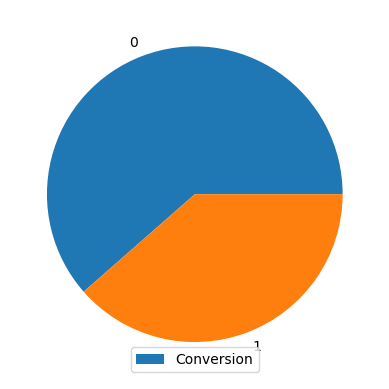

In [25]:
# Conversion Percentage

print('Conversion Percentage is :',round(df.Converted.mean(),2)*100,'%')

plt.pie(df.Converted.value_counts(),labels=df.Converted.value_counts().keys())
plt.legend(['Conversion'],loc=8)

plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5416\811131078.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lead Source'][df['Lead Source'].isin(['bing','google','Click2call','Press_Release','Social Media','Live Chat','youtubechannel',


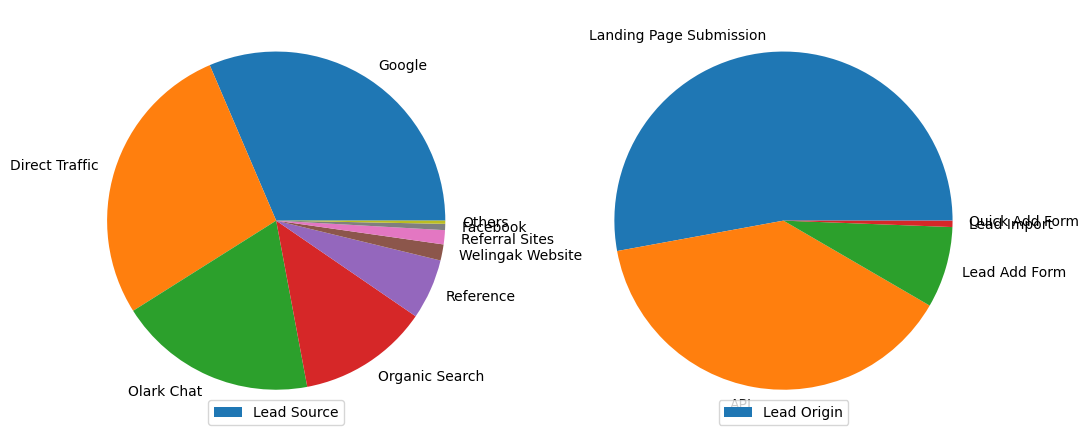

In [26]:
# Lead Source Distribution

plt.figure(figsize=(12,8))

# Lead Source
plt.subplot(1,2,1)
# Modifying the values with lower frequency in dataset to 'Others'
df['Lead Source'][df['Lead Source'].isin(['bing','google','Click2call','Press_Release','Social Media','Live Chat','youtubechannel',
                         'testone','Pay per Click Ads','welearnblog_Home','WeLearn','blog','NC_EDM'])]='Others'
plt.pie(df['Lead Source'].value_counts(),labels=df['Lead Source'].value_counts().keys())
plt.legend(['Lead Source'], loc=8)


# Lead Origin
plt.subplot(1,2,2)
plt.pie(df['Lead Origin'].value_counts(),labels=df['Lead Origin'].value_counts().keys())
plt.legend(['Lead Origin'], loc=8)

plt.show()

The Maximum Lead Sources are through Direct Search methods on Internet

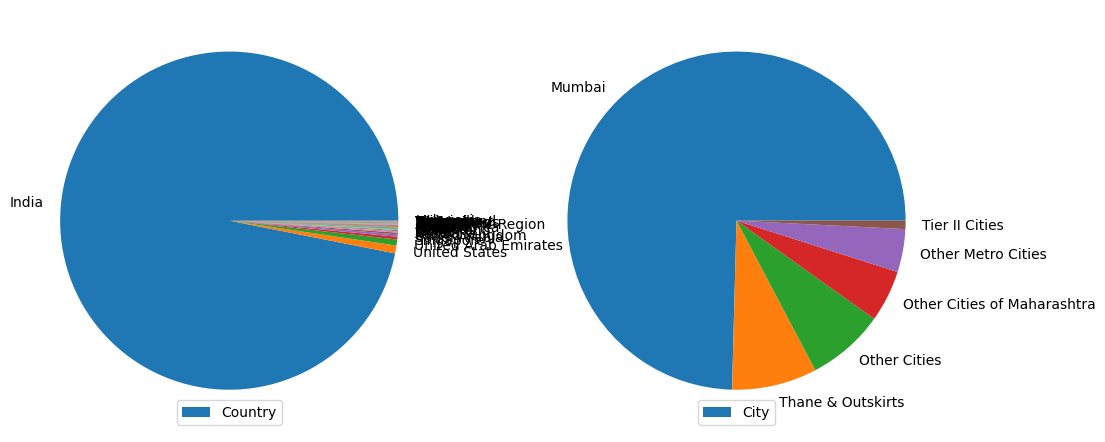

In [27]:
# Checking Geographical Distribution

plt.figure(figsize=(12,8))

# Country
plt.subplot(1,2,1)
plt.pie(df['Country'].value_counts(),labels=df['Country'].value_counts().keys())
plt.legend(['Country'],loc=8)


# City
plt.subplot(1,2,2)
plt.pie(df['City'].value_counts(),labels=df['City'].value_counts().keys())
plt.legend(['City'],loc=8)

plt.show()

Maximum Leads in the Data Set are from Mumbai, India

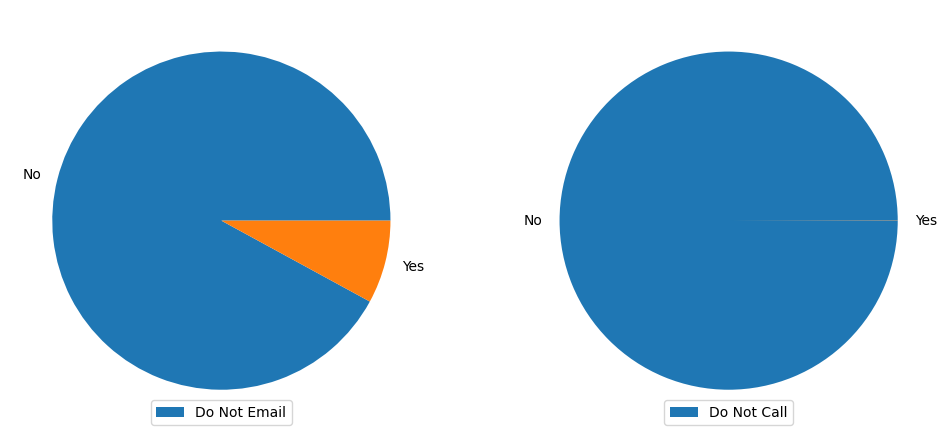

In [28]:
# Checking People who opted for Do Not Email and Do Not Call

plt.figure(figsize=(12,8))

# Do Not Email
plt.subplot(1,2,1)
plt.pie(df['Do Not Email'].value_counts(),labels=df['Do Not Email'].value_counts().keys())
plt.legend(['Do Not Email'],loc=8)


# Do Not call
plt.subplot(1,2,2)
plt.pie(df['Do Not Call'].value_counts(),labels=df['Do Not Call'].value_counts().keys())
plt.legend(['Do Not Call'],loc=8)

plt.show()

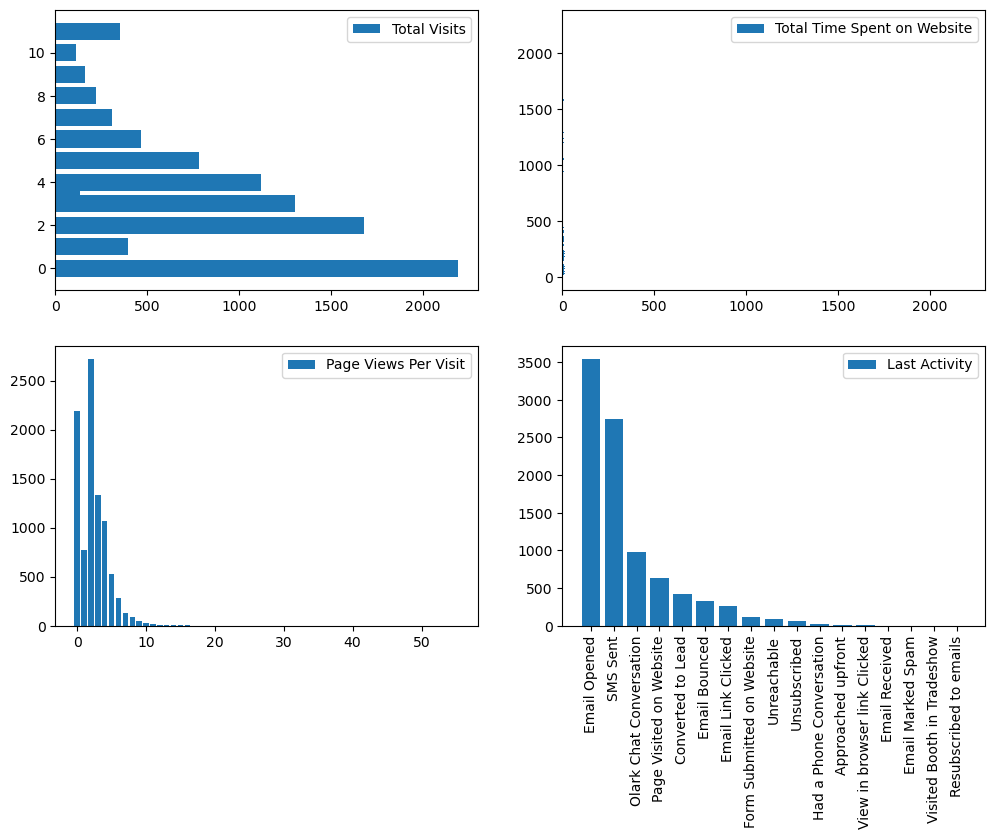

In [29]:
# Evaluating the Next 4 columns related to website activities

plt.figure(figsize=(12,8))

# TotalVisits
plt.subplot(2,2,1)
plt.barh(y=df['TotalVisits'].value_counts().keys(),width=df['TotalVisits'].value_counts())
plt.legend(['Total Visits'])

# Total Time Spent on Website
plt.subplot(2,2,2)
plt.barh(y=df['Total Time Spent on Website'].value_counts().keys(),width=df['Total Time Spent on Website'].value_counts())
plt.legend(['Total Time Spent on Website'])

# Page Views Per Visit
plt.subplot(2,2,3)
plt.bar(x=df['Page Views Per Visit'].value_counts().keys(),height=df['Page Views Per Visit'].value_counts())
plt.legend(['Page Views Per Visit'])

# Last Activity
plt.subplot(2,2,4)
plt.bar(x=df['Last Activity'].value_counts().keys(),height=df['Last Activity'].value_counts())
plt.xticks(rotation='vertical')
plt.legend(['Last Activity'])

plt.show()

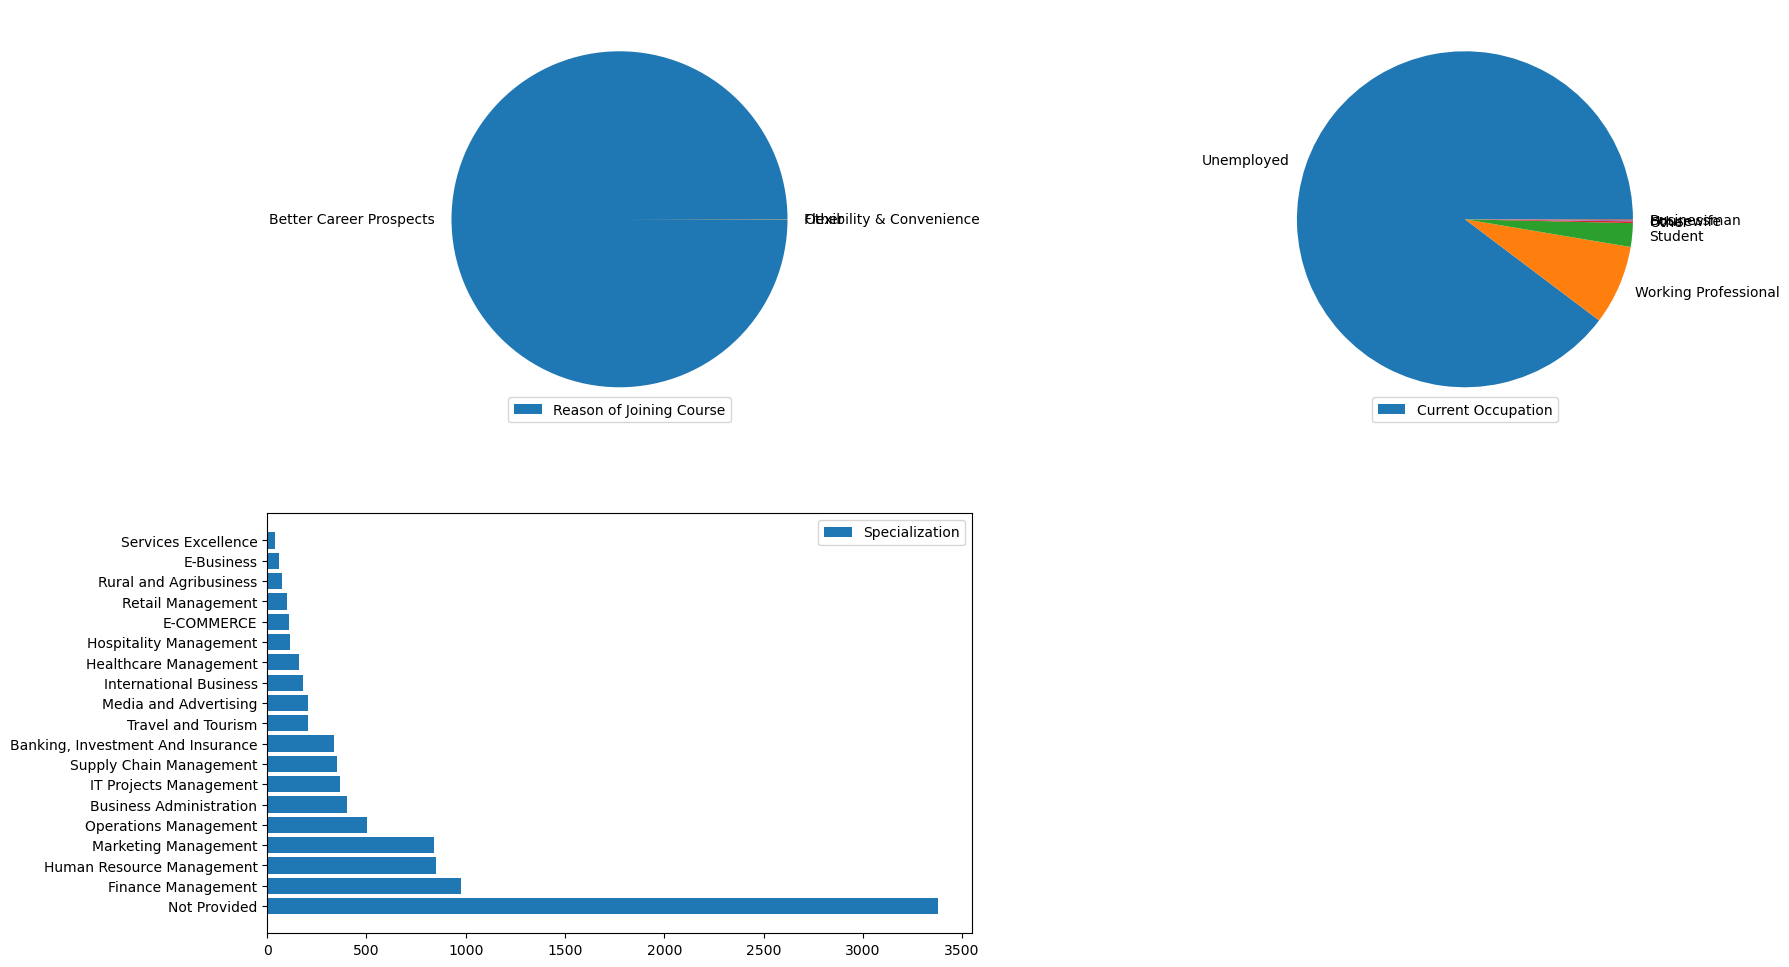

In [30]:
# Evaluating the Next 3 columns related to Categorical Variables

plt.figure(figsize=(20,12))

# Specilization
plt.subplot(2,2,3)
plt.barh(y=df['Specialization'].value_counts().keys(),width=df['Specialization'].value_counts())
plt.legend(['Specialization'])

# Occupation
plt.subplot(2,2,2)
plt.pie(df['Occupation'].value_counts(),labels=df['Occupation'].value_counts().keys())
plt.legend(['Current Occupation'],loc=8)

# Reason
plt.subplot(2,2,1)
plt.pie(labels=df['Reason'].value_counts().keys(),x=df['Reason'].value_counts())
plt.legend(['Reason of Joining Course'], loc=8)

plt.show()

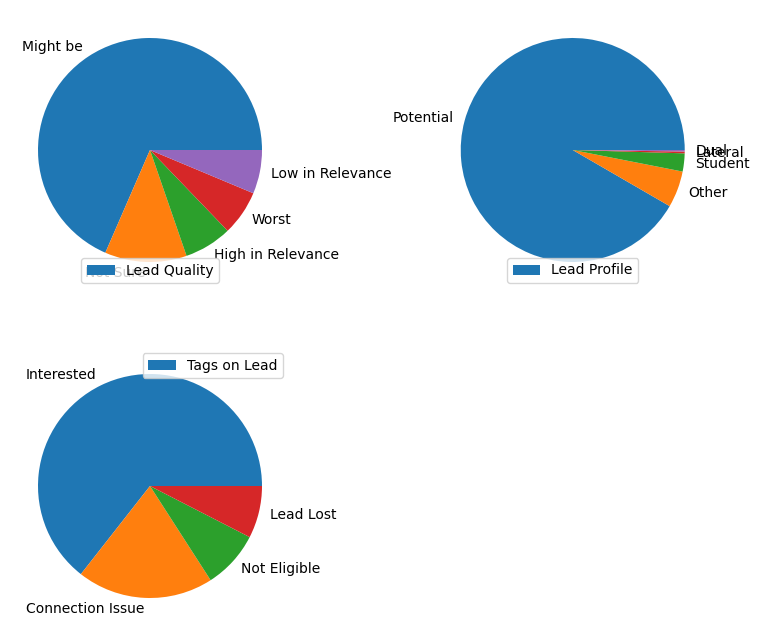

In [31]:
# Evaluating the Next 3 columns related to Lead Quailty

plt.figure(figsize=(10,8))

# Lead Quality
plt.subplot(2,2,1)
plt.pie(labels=df['Lead Quality'].value_counts().keys(),x=df['Lead Quality'].value_counts())
plt.legend(['Lead Quality'],loc=8)

# Lead Profile
plt.subplot(2,2,2)
plt.pie(df['Lead Profile'].value_counts(),labels=df['Lead Profile'].value_counts().keys())
plt.legend(['Lead Profile'],loc=8)

# Tags
plt.subplot(2,2,3)
plt.pie(labels=df['Tags'].value_counts().keys().map({1.0:'Connection Issue',2.0:'Interested',3.0:'Lead Lost',4.0:'Not Eligible'}),
        x=df['Tags'].value_counts())
plt.legend(['Tags on Lead'])
# Using the Maps from above
# Categogy 1 : Call and Connection Related Issues
# Category 2 : Response Awaited, Interest Shown
# Category 3 : Lost to Competition, Closed Not Interested
# Category 4 : Not Eligible, Already a student, Rejected due to Financials and some misc

plt.show()

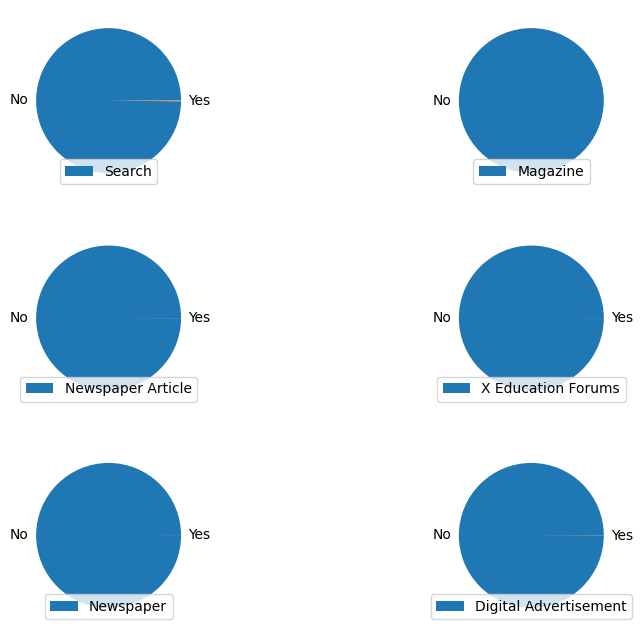

In [32]:
# Evaluating the Next 6 columns related to Lead Generated through Ads

plt.figure(figsize=(10,8))

# Search
plt.subplot(3,2,1)
plt.pie(labels=df['Search'].value_counts().keys(),x=df['Search'].value_counts())
plt.legend(['Search'],loc=8)

# Magazine
plt.subplot(3,2,2)
plt.pie(labels=df['Magazine'].value_counts().keys(),x=df['Magazine'].value_counts())
plt.legend(['Magazine'],loc=8)

# Newspaper Article
plt.subplot(3,2,3)
plt.pie(labels=df['Newspaper Article'].value_counts().keys(),x=df['Newspaper Article'].value_counts())
plt.legend(['Newspaper Article'],loc=8)

# X Education Forums
plt.subplot(3,2,4)
plt.pie(labels=df['X Education Forums'].value_counts().keys(),x=df['X Education Forums'].value_counts())
plt.legend(['X Education Forums'],loc=8)

# Newspaper
plt.subplot(3,2,5)
plt.pie(labels=df['Newspaper'].value_counts().keys(),x=df['Newspaper'].value_counts())
plt.legend(['Newspaper'],loc=8)

# Digital Advertisement
plt.subplot(3,2,6)
plt.pie(labels=df['Digital Advertisement'].value_counts().keys(),x=df['Digital Advertisement'].value_counts())
plt.legend(['Digital Advertisement'],loc=8)


plt.show()

Conclusion comes from above 6 graphs that the Advertisements and Forums are not Generating any Leads

Merging these 6 Columns into 1

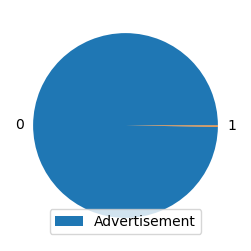

0    9221
1      19
Name: Advertisement, dtype: int64


In [33]:
# Making a New Column Advertisement

# Merging all 6 columns into 1
df['Advertisement']=df['Search'].map({'Yes':1,'No':0}) + df['Magazine'].map({'Yes':1,'No':0}) + df['Newspaper Article'].map({'Yes':1,'No':0}) + df['X Education Forums'].map({'Yes':1,'No':0}) + df['Newspaper'].map({'Yes':1,'No':0}) + df['Digital Advertisement'].map({'Yes':1,'No':0})

# Ensuring No Repetition
df['Advertisement']=df['Advertisement'].apply(lambda x: 1 if x>=1 else 0)

# Dropping the orginial 6 columns
df=df.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'],axis=1)



# Making Graph
plt.figure(figsize=(4,3))
plt.pie(labels=df['Advertisement'].value_counts().keys(),x=df['Advertisement'].value_counts())
plt.legend(['Advertisement'],loc=8)
plt.show()


print(df['Advertisement'].value_counts())

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


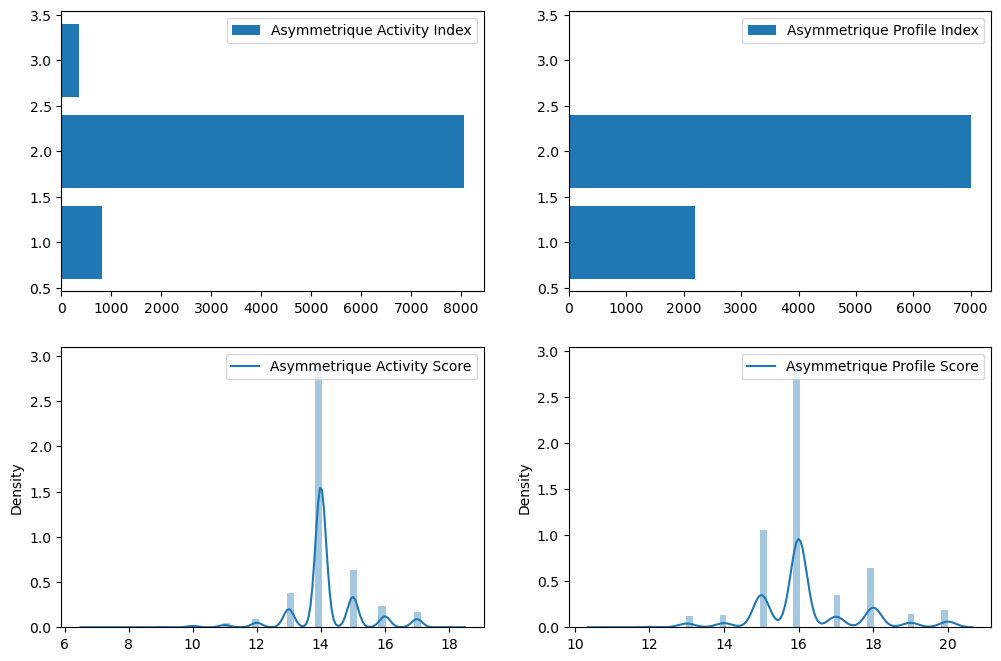

In [34]:
# Evaluating the Next 4 columns related to Profile and Activity Scores

plt.figure(figsize=(12,8))

# Asymmetrique Activity Index
plt.subplot(2,2,1)
plt.barh(y=df['Asymmetrique Activity Index'].value_counts().keys(),width=df['Asymmetrique Activity Index'].value_counts())
plt.legend(['Asymmetrique Activity Index'])

# Asymmetrique Profile Index
plt.subplot(2,2,2)
plt.barh(y=df['Asymmetrique Profile Index'].value_counts().keys(),width=df['Asymmetrique Profile Index'].value_counts())
plt.legend(['Asymmetrique Profile Index'])

# Asymmetrique Activity Score
plt.subplot(2,2,3)
sns.distplot(x=df['Asymmetrique Activity Score'])
plt.legend(['Asymmetrique Activity Score'])


# Asymmetrique Profile Score
plt.subplot(2,2,4)
sns.distplot(x=df['Asymmetrique Profile Score'])
plt.legend(['Asymmetrique Profile Score'])

plt.show()

#### Bivariate Analysis

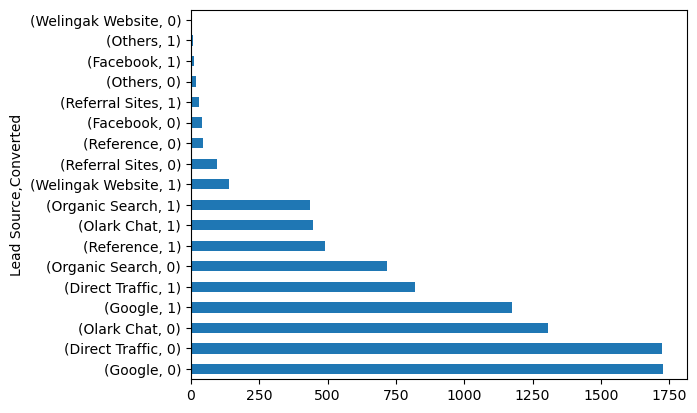

In [35]:
# Lead Source vs Conversion

df[['Lead Source','Converted']].value_counts().plot.barh()
plt.show()

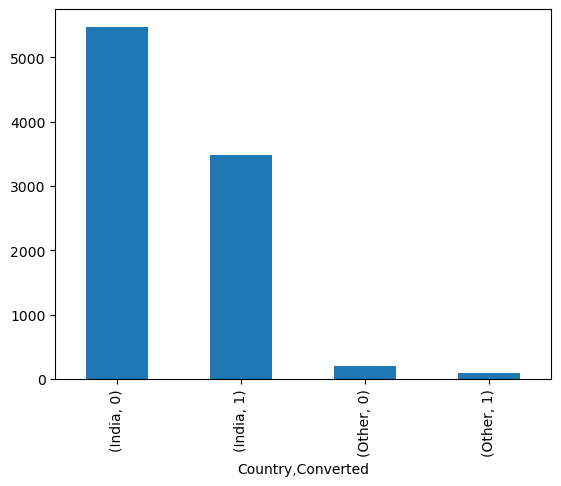

In [36]:
# Checking the Rate of Conversion of different countries
df['Country']=df['Country'].apply(lambda x: 'India' if x=='India' else 'Other')
df[['Country','Converted']].value_counts().plot.bar()
plt.show()

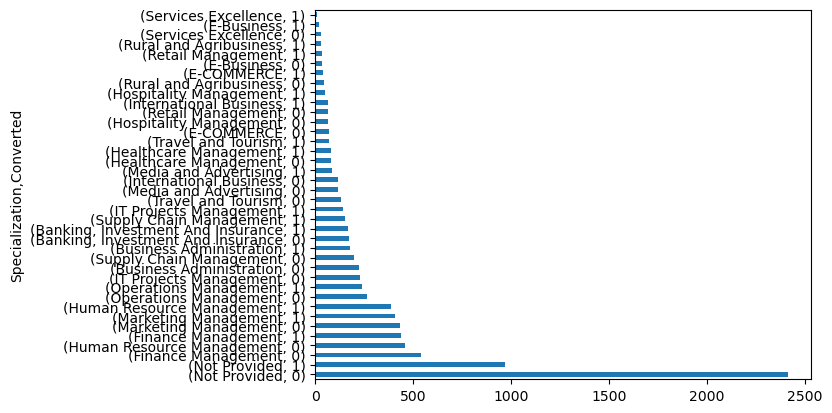

In [37]:
# Specilization vs Conversion

df[['Specialization','Converted']].value_counts().plot.barh()
plt.show()

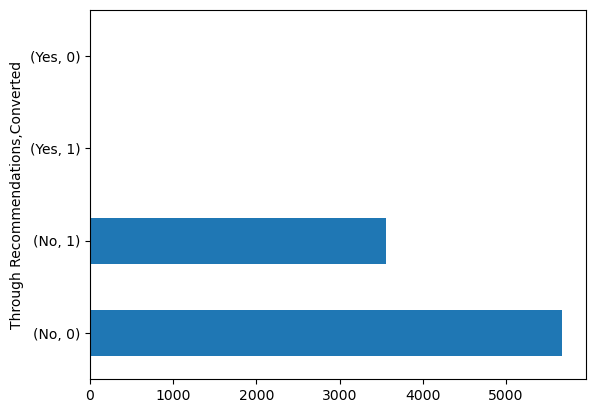

In [38]:
# Recommendations vs Conversion

df[['Through Recommendations','Converted']].value_counts().plot.barh()
plt.show()

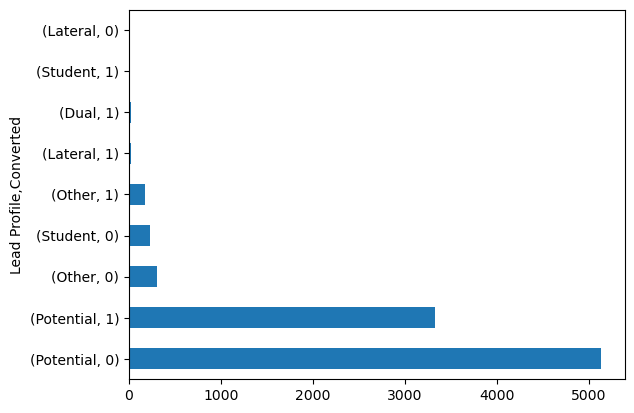

In [39]:
# Lead Profile vs Conversion

df[['Lead Profile','Converted']].value_counts().plot.barh()
plt.show()

#### Multivariate Analysis

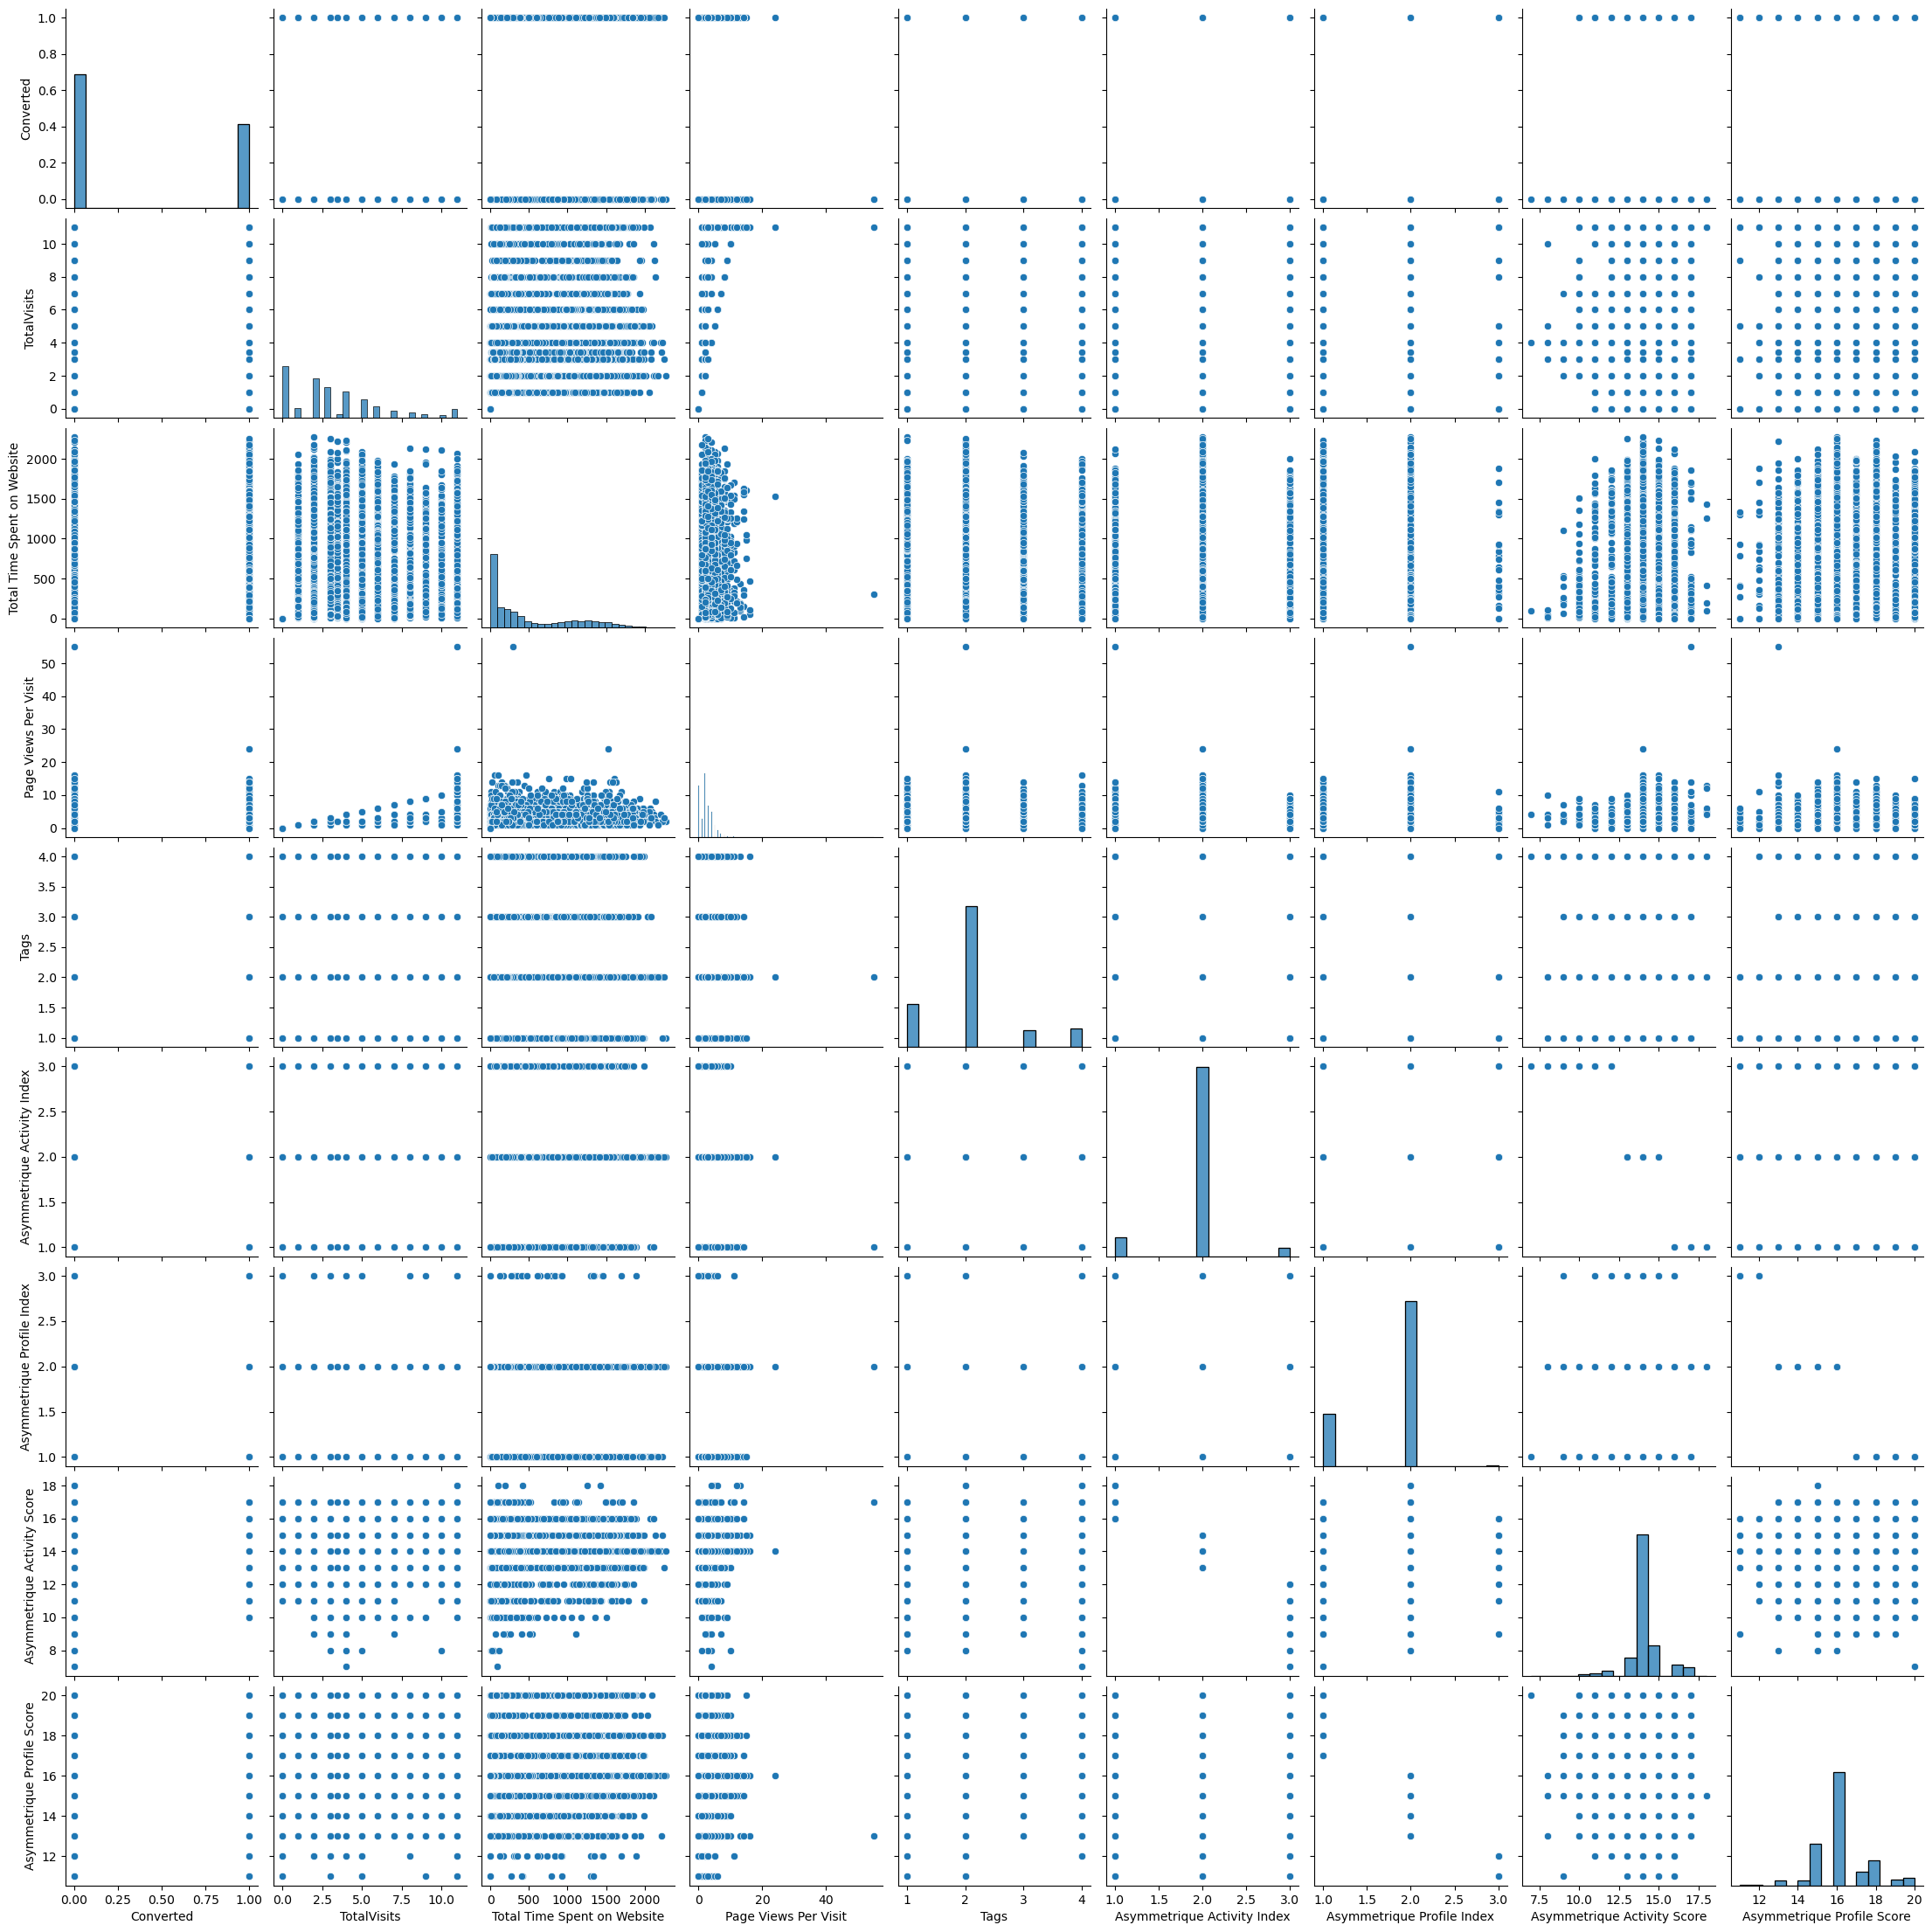

In [40]:
# Making Pair Plot Between numeric columns

# Numeric Columns
n_col=['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Tags','Asymmetrique Activity Index',
       'Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']

# Pair Plot
sns.pairplot(df[n_col])
plt.show()

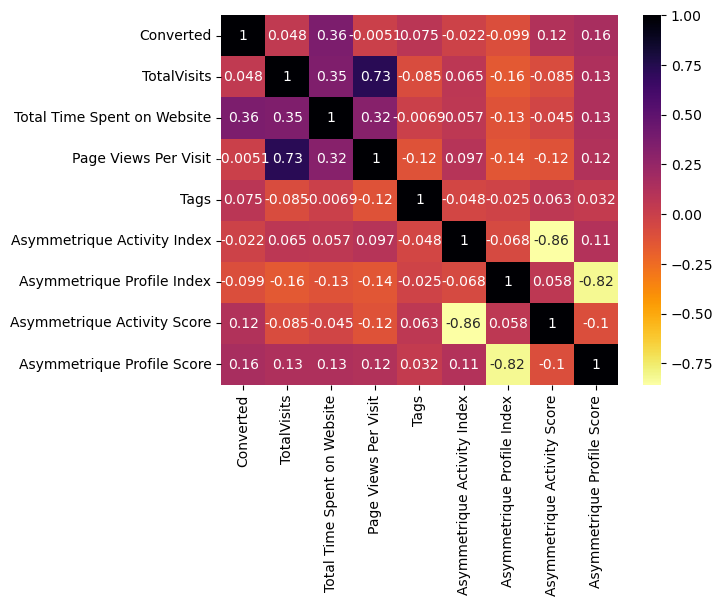

In [41]:
sns.heatmap(df[n_col].corr(),annot=True,cmap='inferno_r')
plt.show()

There is only one variable 'Total Time Spent on Website' that is showing a max correlation of 36%

In [42]:
# Checking Columns with Categorical Variables to create dummies before training model
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

In [43]:
# Modifying the dataset


# 1) Dropping Pospect ID
#df=df.drop('Prospect ID',axis=1)

# 2) Getting Dummies for Column 'Lead Origin'
LO=pd.get_dummies(df['Lead Origin'],drop_first=True)
# Changing the Columns Name
LO.columns=LO.columns.map({'Landing Page Submission':'LO_Page','Lead Add Form':'LO_Form','Lead Import':'LO_Import','Quick Add Form':'LO_Add'})
# Concatinating into Origin Dataset
df=pd.concat([df,LO],axis=1)
# Droping Original Column 'Lead Origin'
df=df.drop('Lead Origin',axis=1)

# 3) Getting Dummies for Column 'Lead Source'
LS=pd.get_dummies(df['Lead Source'],drop_first=True)
# Changing the Column Names
LS.columns=LS.columns.map({'Facebook':'LS_FB','Google':'LS_Google','Olark Chat':'LS_Olark','Organic Search':'LS_Organic',
                          'Others':'LS_Others','Reference':'LS_Ref','Referral Sites':'LS_RefSite','Welingak Website':'LS_Welingak'})
# Concatinating into Origin Dataset
df=pd.concat([df,LS],axis=1)
# Droping Original Column 'Lead Source'
df=df.drop('Lead Source',axis=1)

# 4) Modifying the Next Column 'Do Not Email'
df['Do Not Email']=df['Do Not Email'].map({'Yes':1,'No':0})

# 5) Modifying the Next Column 'Do Not Call'
df['Do Not Call']=df['Do Not Call'].map({'Yes':1,'No':0})

# 6) Getting Dummies for Column 'Last Notable Activity'
# Since two Columns 'Last Activity' and 'Last Notable Activity' are mostly similar
# dropping the Column 'Last Activity'
LA=pd.get_dummies(df['Last Notable Activity'],drop_first=True)
# Changing the Column Names
LA.columns=LA.columns.map({'Email Bounced':'LA_EBounced', 'Email Link Clicked':'LA_ELink',
                           'Email Marked Spam':'LA_ESpam', 'Email Opened':'LA_EOpen', 'Email Received':'LA_EReceive',
                           'Form Submitted on Website':'LA_Form', 'Had a Phone Conversation':'LA_PhoneCall',
                           'Olark Chat Conversation':'LA_Chat', 'Page Visited on Website':'LA_Website',
                           'Resubscribed to emails':'LA_EResub', 'SMS Sent':'LA_SMS', 'Unreachable':'LA_Unreach',
                           'Unsubscribed':'LA_Unsubs','View in browser link Clicked':'LA_Linkview','Modified':'LA_Modified'})
# Concatinating into Origin Dataset
df=pd.concat([df,LA],axis=1)
# Droping Original Columns 'Last Notable Activity' and 'Last Activity'
df=df.drop(['Last Notable Activity','Last Activity'],axis=1)

# 7) Converting to Country for If India or not
df.rename(columns={'Country':'India'},inplace=True)
# Converting Values to 1 & 0
df['India']=df['India'].map({'India':1,'Other':0})

# 8) Getting Dummies for Column 'Lead Source'
SP=pd.get_dummies(df['Specialization'],drop_first=True)
# Changing the Column Names
SP.columns=SP.columns.map({'Business Administration':'SP_Business', 'E-Business':'SP_EBusiness', 'E-COMMERCE':'SP_ECommerce',
                           'Finance Management':'SP_FM', 'Healthcare Management':'SP_HLM', 'Hospitality Management':'SP_HM',
                           'Human Resource Management':'SP_HRM', 'IT Projects Management':'SP_ITPM','International Business':'SP_IB',
                           'Marketing Management':'SP_MM','Media and Advertising':'SP_Media', 'Not Provided':'SP_NP',
                           'Operations Management':'SP_ORM','Retail Management':'SP_RM','Rural and Agribusiness':'SP_RA',
                           'Services Excellence':'SP_SE','Supply Chain Management':'SP_SCM', 'Travel and Tourism':'SP_TT'})
# Concatinating into Origin Dataset
df=pd.concat([df,SP],axis=1)
# Droping Original Column 'Specialization'
df=df.drop('Specialization',axis=1)

# 9) Getting Dummies for Column 'Occupation'
OC=pd.get_dummies(df['Occupation'],drop_first=True)
# Changing the Column Names
OC.columns=OC.columns.map({'Housewife':'OC_Housewife','Other':'OC_Other','Student':'OC_Student','Unemployed':'OC_Unemployed','Working Proffessional':'OC_Working'})
# Concatinating into Origin Dataset
df=pd.concat([df,OC],axis=1)
# Droping Original Column 'Occupation'
df=df.drop('Occupation',axis=1)

# 10) Converting to Reson for If Better Career Prospect or not
df.rename(columns={'Reason':'Reason_Career'},inplace=True)
# Converting Values to 1 & 0
df['Reason_Career']=df['Reason_Career'].apply(lambda x : 1 if x=='Better Career Prospects' else 0)

# 11) Converting the Columns 'Through Recommendations' to 'Recommendations' or not
df.rename(columns={'Through Recommendations':'Recommendations'},inplace=True)
# Converting Values to 1 & 0
df['Recommendations']=df['Recommendations'].map({'Yes':1,'No':0})

# 12) Column 'df['Receive More Updates About Our Courses']' has same value in all rows, so dropping it
df=df.drop('Receive More Updates About Our Courses',axis=1)

# 13) Getting Dummies for Column 'Tags'
TG=pd.get_dummies(df['Tags'],drop_first=True)
# Changing the Column Names
TG.columns=TG.columns.map({2.0:'TG_Interested',3.0:'TG_LeadLost',4.0:'TG_NotEligible'})
# Concatinating into Origin Dataset
df=pd.concat([df,TG],axis=1)
# Droping Original Column 'Tags'
df=df.drop('Tags',axis=1)

# 14) Getting Dummies for Column 'Lead Quality'
LQ=pd.get_dummies(df['Lead Quality'],drop_first=True)
# Changing the Column Names
LQ.columns=LQ.columns.map({'Low in Relevance':'LQ_Low','Might be':'LQ_Mightbe','Not Sure':'LQ_NotSure','Worst':'LQ_Worst'})
# Concatinating into Origin Dataset
df=pd.concat([df,LQ],axis=1)
# Droping Original Column 'Lead Quality'
df=df.drop('Lead Quality',axis=1)

# 15) Column 'df['Update me on Supply Chain Content']' has same value in all rows, so dropping it
df=df.drop('Update me on Supply Chain Content',axis=1)

# 16) Column 'df['Get updates on DM Content']' has same value in all rows, so dropping it
df=df.drop('Get updates on DM Content',axis=1)

# 17) Getting Dummies for Column 'Lead Profile'
LP=pd.get_dummies(df['Lead Profile'],drop_first=True)
# Changing the Column Names
LP.columns=LP.columns.map({'Lateral':'LP_Lateral','Other':'LP_Other','Potential':'LP_Potential','Student':'LP_Student'})
# Concatinating into Origin Dataset
df=pd.concat([df,LP],axis=1)
# Droping Original Column 'Lead Profile'
df=df.drop('Lead Profile',axis=1)

# 18) Getting Dummies for Column 'City'
CT=pd.get_dummies(df['City'],drop_first=True)
# Changing the Column Names
CT.columns=CT.columns.map({'Other Cities':'CT_OC','Other Cities of Maharashtra':'CT_OCM','Other Metro Cities':'CT_OMC',
                           'Thane & Outskirts':'CT_Thane', 'Tier II Cities':'CT_T2C'})
# Concatinating into Origin Dataset
df=pd.concat([df,CT],axis=1)
# Droping Original Column 'City'
df=df.drop('City',axis=1)

# 19) Column 'df['I agree to pay the amount through cheque']' has same value in all rows, so dropping it
df=df.drop('I agree to pay the amount through cheque',axis=1)

# 20) Converting the Columns 'A free copy of Mastering The Interview' to 'InterviewCopy' or not
df.rename(columns={'A free copy of Mastering The Interview':'InterviewCopy'},inplace=True)
# Converting Values to 1 & 0
df['InterviewCopy']=df['InterviewCopy'].map({'Yes':1,'No':0})

# 21) Column 'df['Prospect ID']' has no use, so dropping it
df=df.drop('Prospect ID',axis=1)

# 21) Column 'df['Lead Number']' has no use, so dropping it
df=df.drop('Lead Number',axis=1)




# Finally the DataSet is ready for Modelling

In [44]:
# Checking the Modified Data Set
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,India,Reason_Career,Recommendations,Asymmetrique Activity Index,...,LQ_Worst,LP_Lateral,LP_Other,LP_Potential,LP_Student,CT_OC,CT_OCM,CT_OMC,CT_Thane,CT_T2C
0,0,0,0,0.0,0,0.0,1,1,0,2,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674,2.0,1,1,0,2,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,2,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,1,0,2,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,1,0,2,...,0,0,0,1,0,0,0,0,0,0


In [45]:
# Checking Column List

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 81 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Do Not Email                 9240 non-null   int64  
 1   Do Not Call                  9240 non-null   int64  
 2   Converted                    9240 non-null   int64  
 3   TotalVisits                  9240 non-null   float64
 4   Total Time Spent on Website  9240 non-null   int64  
 5   Page Views Per Visit         9240 non-null   float64
 6   India                        9240 non-null   int64  
 7   Reason_Career                9240 non-null   int64  
 8   Recommendations              9240 non-null   int64  
 9   Asymmetrique Activity Index  9240 non-null   int64  
 10  Asymmetrique Profile Index   9240 non-null   int64  
 11  Asymmetrique Activity Score  9240 non-null   float64
 12  Asymmetrique Profile Score   9240 non-null   float64
 13  InterviewCopy     

### DL Modeling

In [46]:
# importing libraries
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [47]:
# Spliting Dataset into test train split
x=df.drop('Converted',axis=1)
y=df.Converted

# Train Test Split
X_train, X_test, y_train, y_test=train_test_split(x,y, train_size=0.7,random_state=100)

In [48]:
X_train

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,India,Reason_Career,Recommendations,Asymmetrique Activity Index,Asymmetrique Profile Index,...,LQ_Worst,LP_Lateral,LP_Other,LP_Potential,LP_Student,CT_OC,CT_OCM,CT_OMC,CT_Thane,CT_T2C
1871,0,0,0.000000,0,0.0,1,1,0,2,2,...,0,0,0,1,0,0,0,0,0,0
6795,0,0,4.000000,487,1.0,1,1,0,2,2,...,0,0,0,1,0,1,0,0,0,0
3516,0,0,5.000000,106,2.0,1,1,0,2,2,...,0,0,0,1,0,0,0,0,0,0
8105,0,0,5.000000,1230,5.0,1,1,0,2,2,...,0,0,0,1,0,0,0,0,0,0
3934,0,0,0.000000,0,0.0,1,1,0,2,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0.000000,0,0.0,1,1,0,2,1,...,0,1,0,0,0,0,0,0,1,0
79,0,0,3.445238,705,2.0,1,1,0,2,2,...,0,0,0,1,0,0,0,0,1,0
8039,0,0,0.000000,0,0.0,1,1,0,2,2,...,0,0,0,1,0,0,0,0,0,0
6936,0,0,2.000000,238,2.0,1,1,0,2,2,...,0,0,0,1,0,0,0,0,0,0


In [49]:
# Model Training
lr= LogisticRegression()

In [50]:
# Using RFE
rfe = RFE(lr, n_features_to_select=30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)
rfe.support_

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the d

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

array([ True, False, False, False, False, False, False,  True,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
       False, False,  True, False, False, False, False,  True,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True, False, False, False, False, False, False])

In [51]:
# Checking Column List
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 32),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 50),
 ('Page Views Per Visit', False, 40),
 ('India', False, 38),
 ('Reason_Career', False, 19),
 ('Recommendations', True, 1),
 ('Asymmetrique Activity Index', True, 1),
 ('Asymmetrique Profile Index', False, 10),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', False, 27),
 ('InterviewCopy', False, 21),
 ('Advertisement', True, 1),
 ('LO_Page', True, 1),
 ('LO_Form', True, 1),
 ('LO_Import', False, 24),
 ('LO_Add', True, 1),
 ('LS_FB', False, 16),
 ('LS_Google', False, 37),
 ('LS_Olark', True, 1),
 ('LS_Organic', False, 48),
 ('LS_Others', False, 47),
 ('LS_Ref', False, 8),
 ('LS_RefSite', False, 7),
 ('LS_Welingak', True, 1),
 ('LA_EBounced', True, 1),
 ('LA_ELink', True, 1),
 ('LA_ESpam', False, 41),
 ('LA_EOpen', True, 1),
 ('LA_EReceive', False, 49),
 ('LA_Form', False, 42),
 ('LA_PhoneCall', True, 1),
 ('LA_Modified', True, 1),
 

In [52]:
# Making List of Columns that are relavant according to RFE
col = X_train.columns[rfe.support_]

In [53]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2001.5
Date:                Mon, 16 Oct 2023   Deviance:                       4002.9
Time:                        10:04:37   Pearson chi2:                 8.84e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.5086
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         -14.9908      1.789     -8.380      0.000     -18.497     -11.485
Do Not Email                   -1.2535      0.206     -6.089      0.000      -1.657      -0.850
Recommendations                 1.2430      1.209      1.028      0.304      -1.127       3.613
Asymmetrique Activity Index     1.8340      0.231      7.955      0.000       1.382       2.286
Asymmetrique Activity Score     1.0574      0.086     12.341      0.000       0.889       1.225
Advertisement                   0.7204      0.861      0.837      0.403      -0.967       2.408
LO_Page                        -0.8787      0.157     -5.613      0.000      -1.186      -0.572
LO_Form                         1.3742      0.257      5.356      0.000       0.871       1.877
LO_Add                         22.7477   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
LS_Olark                       -0.7788      0.128     -6.094      0.000      -1.029      -0.528
LS_Welingak                     2.8607      0.785      3.642      0.000       1.321       4.400
LA_EBounced                    -0.8994      0.674     -1.335      0.182      -2.220       0.421
LA_ELink                       -1.6574      0.527     -3.147      0.002      -2.690      -0.625
LA_EOpen                       -0.7706      0.421     -1.830      0.067      -1.596       0.055
LA_PhoneCall                    1.6805      1.209      1.390      0.165      -0.690       4.051
LA_Modified                    -1.8540      0.420     -4.419      0.000      -2.676      -1.032
LA_Chat                        -2.1293      0.531     -4.010      0.000      -3.170      -1.088
LA_Website                     -1.2419      0.461     -2.694      0.007      -2.146      -0.338
LA_SMS                          1.6629      0.424      3.924      0.000       0.832       2.493
SP_NP                          -0.9801      0.152     -6.467      0.000      -1.277      -0.683
OC_Other                       -0.3196      1.434     -0.223      0.824      -3.130       2.491
OC_Unemployed                  -0.7988      0.379     -2.108      0.035      -1.541      -0.056
nan                             1.3330      0.440      3.031      0.002       0.471       2.195
TG_Interested                   3.4957      0.155     22.582      0.000       3.192       3.799
TG_LeadLost                     5.6617      0.226     25.089      0.000       5.219       6.104
LQ_Low                         -1.1420      0.331     -3.447      0.001      -1.791      -0.493
LQ_Mightbe                     -3.0605      0.290    -10.549      0.000      -3.629      -2.492
LQ_NotSure                     -2.2917      0.318     -7.195      0.000      -2.916      -1.667
LQ_Worst                       -6.1533      0.502    -12.258      0.000      -7.137      -5.169
LP_Other   

In [54]:
def model_pred(res,y):
    # Getting the predicted values on the train set
    y_train_pred = res.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)
    # Creating a dataframe with the actual converted flag and the predicted probabilities
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
    y_train_pred_final['ID'] = y_train.index
    # Creating new column 'predicted' with 1 if Converted_Prob > y else 0
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > y else 0)
    # Confusion matrix
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
    print(confusion)
    # Let's check the overall accuracy.
    print('The Accuracy of the GLM Model is: ',round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)*100))

    return y_train_pred_final

    

In [55]:
# Checking Accuracy
y_train_pred_final=model_pred(res,0.5)

[[3731  271]
 [ 500 1966]]
The Accuracy of the GLM Model is:  88


In [56]:
# The New Dataset
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted
0,0,0.091702,1871,0
1,0,0.154005,6795,0
2,0,0.006064,3516,0
3,0,0.143612,8105,0
4,0,0.063743,3934,0


#### VIF

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Asymmetrique Activity Score,121.93
29,LP_Potential,47.69
20,OC_Unemployed,42.69
14,LA_Modified,42.01
12,LA_EOpen,35.30
2,Asymmetrique Activity Index,32.89
17,LA_SMS,27.77
25,LQ_Mightbe,13.53
5,LO_Page,7.55
16,LA_Website,4.98


In [58]:
# Since the VIF value of 'Asymmetrique Activity Score' is unnaturally high, remiving this column
col=col.drop('Asymmetrique Activity Score')

#### GLM Model 2

In [59]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2084.6
Date:                Mon, 16 Oct 2023   Deviance:                       4169.2
Time:                        10:04:38   Pearson chi2:                 9.46e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4958
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           4.6320      0.839      5.520      0.000       2.987       6.277
Do Not Email                   -1.2259      0.205     -5.991      0.000      -1.627      -0.825
Recommendations                 1.2563      1.157      1.086      0.278      -1.012       3.524
Asymmetrique Activity Index    -0.6420      0.119     -5.410      0.000      -0.875      -0.409
Advertisement                   0.8712      0.862      1.011      0.312      -0.818       2.561
LO_Page                        -0.8405      0.152     -5.534      0.000      -1.138      -0.543
LO_Form                         1.4665      0.254      5.777      0.000       0.969       1.964
LO_Add                         22.6317   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
LS_Olark                       -0.5805      0.124     -4.685      0.000      -0.823      -0.338
LS_Welingak                     2.7981      0.770      3.632      0.000       1.288       4.308
LA_EBounced                    -0.8063      0.666     -1.211      0.226      -2.111       0.499
LA_ELink                       -1.5533      0.516     -3.013      0.003      -2.564      -0.543
LA_EOpen                       -0.7403      0.409     -1.811      0.070      -1.541       0.061
LA_PhoneCall                    1.4238      1.183      1.204      0.229      -0.894       3.742
LA_Modified                    -1.6973      0.407     -4.173      0.000      -2.494      -0.900
LA_Chat                        -1.8260      0.513     -3.557      0.000      -2.832      -0.820
LA_Website                     -1.0901      0.447     -2.436      0.015      -1.967      -0.213
LA_SMS                          1.6775      0.411      4.077      0.000       0.871       2.484
SP_NP                          -0.9230      0.147     -6.281      0.000      -1.211      -0.635
OC_Other                       -0.4267      1.458     -0.293      0.770      -3.284       2.431
OC_Unemployed                  -0.9065      0.380     -2.386      0.017      -1.651      -0.162
nan                             1.2903      0.438      2.945      0.003       0.432       2.149
TG_Interested                   3.5120      0.153     22.958      0.000       3.212       3.812
TG_LeadLost                     5.5665      0.220     25.256      0.000       5.135       5.998
LQ_Low                         -1.1728      0.330     -3.559      0.000      -1.819      -0.527
LQ_Mightbe                     -3.1603      0.290    -10.913      0.000      -3.728      -2.593
LQ_NotSure                     -2.4037      0.317     -7.574      0.000      -3.026      -1.782
LQ_Worst                       -6.0974      0.498    -12.251      0.000      -7.073      -5.122
LP_Other                       -1.6641      0.598     -2.782      0.005      -2.836      -0.492
LP_Potentia

In [60]:
# Checking Accuracy
y_train_pred_final=model_pred(res2,0.5)
y_train_pred_final

[[3771  231]
 [ 552 1914]]
The Accuracy of the GLM Model is:  88


,Converted,Converted_Prob,ID,predicted
0,0,0.038468,1871,0
1,0,0.161606,6795,0
2,0,0.007404,3516,0
3,0,0.139741,8105,0
4,0,0.087597,3934,0
...,...,...,...,...
6463,1,0.998745,350,1
6464,1,0.991927,79,1
6465,1,0.199984,8039,0
6466,0,0.005529,6936,0


In [61]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
28,LP_Potential,43.56
19,OC_Unemployed,37.89
2,Asymmetrique Activity Index,29.43
13,LA_Modified,25.47
11,LA_EOpen,20.97
16,LA_SMS,16.99
24,LQ_Mightbe,13.24
4,LO_Page,7.32
17,SP_NP,4.82
21,TG_Interested,4.56


In [62]:
# Since the VIF value of 'LP_Potential' is high, remiving this column
col=col.drop('LP_Potential')

#### GLM Model 3

In [63]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2090.5
Date:                Mon, 16 Oct 2023   Deviance:                       4181.1
Time:                        10:04:38   Pearson chi2:                 9.39e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4949
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           2.9722      0.695      4.279      0.000       1.611       4.334
Do Not Email                   -1.2310      0.203     -6.052      0.000      -1.630      -0.832
Recommendations                 1.2508      1.155      1.083      0.279      -1.013       3.515
Asymmetrique Activity Index    -0.6429      0.119     -5.424      0.000      -0.875      -0.411
Advertisement                   0.8627      0.859      1.004      0.315      -0.822       2.547
LO_Page                        -0.8461      0.152     -5.578      0.000      -1.143      -0.549
LO_Form                         1.4790      0.254      5.820      0.000       0.981       1.977
LO_Add                         22.6302   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
LS_Olark                       -0.5753      0.124     -4.651      0.000      -0.818      -0.333
LS_Welingak                     2.7898      0.771      3.620      0.000       1.280       4.300
LA_EBounced                    -0.8080      0.666     -1.214      0.225      -2.113       0.497
LA_ELink                       -1.5504      0.517     -3.000      0.003      -2.563      -0.538
LA_EOpen                       -0.7222      0.410     -1.762      0.078      -1.526       0.081
LA_PhoneCall                    1.4207      1.182      1.202      0.230      -0.897       3.738
LA_Modified                    -1.6852      0.408     -4.131      0.000      -2.485      -0.886
LA_Chat                        -1.8165      0.514     -3.531      0.000      -2.825      -0.808
LA_Website                     -1.0822      0.448     -2.413      0.016      -1.961      -0.203
LA_SMS                          1.6750      0.413      4.061      0.000       0.867       2.484
SP_NP                          -0.9320      0.147     -6.355      0.000      -1.219      -0.645
OC_Other                       -0.7721      1.414     -0.546      0.585      -3.544       1.999
OC_Unemployed                  -1.1293      0.391     -2.888      0.004      -1.896      -0.363
nan                             1.0744      0.448      2.401      0.016       0.197       1.952
TG_Interested                   3.4795      0.152     22.838      0.000       3.181       3.778
TG_LeadLost                     5.5289      0.220     25.087      0.000       5.097       5.961
LQ_Low                         -1.1350      0.328     -3.458      0.001      -1.778      -0.492
LQ_Mightbe                     -3.1844      0.288    -11.074      0.000      -3.748      -2.621
LQ_NotSure                     -2.4272      0.315     -7.698      0.000      -3.045      -1.809
LQ_Worst                       -5.8209      0.474    -12.273      0.000      -6.751      -4.891
LP_Other                        0.1944      0.221      0.878      0.380      -0.239       0.628
===========

In [64]:
# Checking Accuracy
y_train_pred_final=model_pred(res3,0.5)
y_train_pred_final.head()

[[3771  231]
 [ 556 1910]]
The Accuracy of the GLM Model is:  88


,Converted,Converted_Prob,ID,predicted
0,0,0.040397,1871,0
1,0,0.161345,6795,0
2,0,0.007714,3516,0
3,0,0.142032,8105,0
4,0,0.087833,3934,0


In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,OC_Unemployed,34.12
2,Asymmetrique Activity Index,28.53
13,LA_Modified,23.10
11,LA_EOpen,18.97
16,LA_SMS,15.31
24,LQ_Mightbe,12.90
4,LO_Page,7.27
17,SP_NP,4.80
21,TG_Interested,4.44
20,NaN,4.00


In [66]:
# Since the VIF value of 'OC_Unemployed' is high, remiving this column
col=col.drop('OC_Unemployed')

#### GLM Model 4

In [67]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2095.0
Date:                Mon, 16 Oct 2023   Deviance:                       4190.0
Time:                        10:04:39   Pearson chi2:                 9.42e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4942
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           1.8872      0.578      3.266      0.001       0.755       3.020
Do Not Email                   -1.2286      0.203     -6.039      0.000      -1.627      -0.830
Recommendations                 1.2475      1.155      1.080      0.280      -1.017       3.512
Asymmetrique Activity Index    -0.6490      0.118     -5.478      0.000      -0.881      -0.417
Advertisement                   0.8574      0.860      0.997      0.319      -0.827       2.542
LO_Page                        -0.8429      0.152     -5.536      0.000      -1.141      -0.544
LO_Form                         1.4934      0.253      5.911      0.000       0.998       1.989
LO_Add                         22.6188   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
LS_Olark                       -0.5760      0.124     -4.661      0.000      -0.818      -0.334
LS_Welingak                     2.7729      0.770      3.600      0.000       1.263       4.282
LA_EBounced                    -0.8544      0.665     -1.286      0.199      -2.157       0.448
LA_ELink                       -1.5833      0.515     -3.075      0.002      -2.593      -0.574
LA_EOpen                       -0.7445      0.408     -1.826      0.068      -1.544       0.054
LA_PhoneCall                    1.3853      1.181      1.173      0.241      -0.930       3.701
LA_Modified                    -1.7090      0.406     -4.212      0.000      -2.504      -0.914
LA_Chat                        -1.8473      0.513     -3.603      0.000      -2.852      -0.842
LA_Website                     -1.1072      0.446     -2.482      0.013      -1.982      -0.233
LA_SMS                          1.6575      0.410      4.041      0.000       0.853       2.461
SP_NP                          -0.9379      0.147     -6.363      0.000      -1.227      -0.649
OC_Other                        0.2832      1.366      0.207      0.836      -2.394       2.960
nan                             2.1814      0.228      9.562      0.000       1.734       2.629
TG_Interested                   3.4872      0.152     22.887      0.000       3.189       3.786
TG_LeadLost                     5.5285      0.221     25.069      0.000       5.096       5.961
LQ_Low                         -1.0848      0.327     -3.317      0.001      -1.726      -0.444
LQ_Mightbe                     -3.1916      0.287    -11.114      0.000      -3.754      -2.629
LQ_NotSure                     -2.4394      0.315     -7.747      0.000      -3.057      -1.822
LQ_Worst                       -5.7763      0.473    -12.208      0.000      -6.704      -4.849
LP_Other                        0.2133      0.221      0.967      0.333      -0.219       0.646
===============================================================================================
"""

In [68]:
# Checking Accuracy
y_train_pred_final=model_pred(res4,0.5)
y_train_pred_final.head()

[[3772  230]
 [ 560 1906]]
The Accuracy of the GLM Model is:  88


,Converted,Converted_Prob,ID,predicted
0,0,0.040283,1871,0
1,0,0.162410,6795,0
2,0,0.007685,3516,0
3,0,0.143356,8105,0
4,0,0.088022,3934,0


In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Asymmetrique Activity Index,27.08
13,LA_Modified,17.55
11,LA_EOpen,14.32
23,LQ_Mightbe,12.70
16,LA_SMS,11.72
4,LO_Page,7.22
17,SP_NP,4.79
20,TG_Interested,4.39
24,LQ_NotSure,3.36
15,LA_Website,2.52


In [70]:
# Since the VIF value of 'Asymmetrique Activity Index' is high, remiving this column
col=col.drop('Asymmetrique Activity Index')

#### GLM Model 5

In [71]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = logm5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2110.2
Date:                Mon, 16 Oct 2023   Deviance:                       4220.4
Time:                        10:04:39   Pearson chi2:                 1.03e+04
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4918
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5218      0.513      1.017      0.309      -0.484       1.527
Do Not Email       -1.2320      0.202     -6.112      0.000      -1.627      -0.837
Recommendations     1.2124      1.160      1.045      0.296      -1.061       3.485
Advertisement       0.8350      0.861      0.969      0.332      -0.853       2.523
LO_Page            -0.8260      0.151     -5.469      0.000      -1.122      -0.530
LO_Form             1.4877      0.252      5.915      0.000       0.995       1.981
LO_Add             22.6047   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
LS_Olark           -0.4438      0.121     -3.683      0.000      -0.680      -0.208
LS_Welingak         2.7584      0.772      3.573      0.000       1.245       4.271
LA_EBounced        -0.7341      0.655     -1.121      0.262      -2.018       0.550
LA_ELink           -1.5233      0.511     -2.981      0.003      -2.525      -0.522
LA_EOpen           -0.7378      0.403     -1.830      0.067      -1.528       0.053
LA_PhoneCall        1.4905      1.177      1.267      0.205      -0.815       3.796
LA_Modified        -1.6804      0.401     -4.188      0.000      -2.467      -0.894
LA_Chat            -1.6711      0.507     -3.294      0.001      -2.665      -0.677
LA_Website         -1.0707      0.441     -2.426      0.015      -1.936      -0.206
LA_SMS              1.6529      0.406      4.072      0.000       0.857       2.448
SP_NP              -0.9108      0.146     -6.232      0.000      -1.197      -0.624
OC_Other            0.3499      1.396      0.251      0.802      -2.385       3.085
nan                 2.2013      0.228      9.650      0.000       1.754       2.648
TG_Interested       3.5002      0.151     23.154      0.000       3.204       3.797
TG_LeadLost         5.4900      0.219     25.125      0.000       5.062       5.918
LQ_Low             -1.0596      0.321     -3.303      0.001      -1.688      -0.431
LQ_Mightbe         -3.1482      0.281    -11.220      0.000      -3.698      -2.598
LQ_NotSure         -2.4093      0.308     -7.819      0.000      -3.013      -1.805
LQ_Worst           -5.6681      0.466    -12.155      0.000      -6.582      -4.754
LP_Other            0.2028      0.220      0.920      0.357      -0.229       0.635
===================================================================================
"""

In [72]:
# Checking Accuracy
y_train_pred_final=model_pred(res5,0.5)
y_train_pred_final.head()

[[3770  232]
 [ 561 1905]]
The Accuracy of the GLM Model is:  88


,Converted,Converted_Prob,ID,predicted
0,0,0.044396,1871,0
1,0,0.167870,6795,0
2,0,0.008847,3516,0
3,0,0.141907,8105,0
4,0,0.103290,3934,0


In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,LQ_Mightbe,12.50
12,LA_Modified,10.90
10,LA_EOpen,8.42
15,LA_SMS,7.24
3,LO_Page,7.16
16,SP_NP,4.78
19,TG_Interested,4.38
23,LQ_NotSure,3.31
24,LQ_Worst,2.33
6,LS_Olark,1.98


In [74]:
# Since the VIF value of 'LQ_Mightbe' is high, remiving this column
col=col.drop('LQ_Mightbe')

#### GLM Model 6

In [75]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res6 = logm6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6442
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2224.3
Date:                Mon, 16 Oct 2023   Deviance:                       4448.5
Time:                        10:04:40   Pearson chi2:                 1.22e+04
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4735
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1477      0.419     -5.127      0.000      -2.969      -1.327
Do Not Email       -1.2566      0.195     -6.435      0.000      -1.639      -0.874
Recommendations     0.9845      1.148      0.858      0.391      -1.266       3.235
Advertisement       0.9173      0.819      1.121      0.262      -0.687       2.522
LO_Page            -1.0202      0.143     -7.132      0.000      -1.301      -0.740
LO_Form             1.8933      0.239      7.938      0.000       1.426       2.361
LO_Add             22.2764   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
LS_Olark           -0.4617      0.119     -3.895      0.000      -0.694      -0.229
LS_Welingak         2.3313      0.769      3.033      0.002       0.825       3.838
LA_EBounced        -0.9409      0.647     -1.453      0.146      -2.210       0.328
LA_ELink           -1.6724      0.485     -3.448      0.001      -2.623      -0.722
LA_EOpen           -0.7719      0.378     -2.044      0.041      -1.512      -0.032
LA_PhoneCall        2.5194      1.397      1.804      0.071      -0.218       5.257
LA_Modified        -1.8464      0.376     -4.908      0.000      -2.584      -1.109
LA_Chat            -1.8252      0.486     -3.759      0.000      -2.777      -0.874
LA_Website         -1.2074      0.416     -2.902      0.004      -2.023      -0.392
LA_SMS              1.5010      0.381      3.937      0.000       0.754       2.248
SP_NP              -1.2647      0.138     -9.163      0.000      -1.535      -0.994
OC_Other            0.7292      1.236      0.590      0.555      -1.694       3.153
nan                 2.1461      0.226      9.489      0.000       1.703       2.589
TG_Interested       3.5403      0.149     23.699      0.000       3.248       3.833
TG_LeadLost         5.7600      0.214     26.932      0.000       5.341       6.179
LQ_Low              1.8498      0.174     10.629      0.000       1.509       2.191
LQ_NotSure          0.5949      0.150      3.975      0.000       0.302       0.888
LQ_Worst           -2.8974      0.384     -7.554      0.000      -3.649      -2.146
LP_Other            0.1598      0.219      0.728      0.467      -0.270       0.590
===================================================================================
"""

In [76]:
# Checking Accuracy
y_train_pred_final=model_pred(res6,0.5)
y_train_pred_final.head()

[[3766  236]
 [ 604 1862]]
The Accuracy of the GLM Model is:  87


,Converted,Converted_Prob,ID,predicted
0,0,0.058065,1871,0
1,0,0.159196,6795,0
2,0,0.009509,3516,0
3,0,0.158839,8105,0
4,0,0.101546,3934,0


Now the Accuracy has dropped by one percent

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LO_Page,6.92
12,LA_Modified,6.89
10,LA_EOpen,5.39
15,LA_SMS,4.74
16,SP_NP,4.49
19,TG_Interested,4.38
6,LS_Olark,1.98
4,LO_Form,1.92
14,LA_Website,1.52
20,TG_LeadLost,1.50


In [78]:
# Since the VIF value of 'LO_Page' is high, remiving this column
col=col.drop('LO_Page')

#### GLM Model 7

In [79]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res7 = logm7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6443
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2250.5
Date:                Mon, 16 Oct 2023   Deviance:                       4501.1
Time:                        10:04:41   Pearson chi2:                 1.15e+04
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4692
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.0454      0.397     -7.671      0.000      -3.823      -2.267
Do Not Email       -1.3347      0.192     -6.957      0.000      -1.711      -0.959
Recommendations     1.0097      1.171      0.862      0.389      -1.286       3.306
Advertisement       0.6676      0.802      0.833      0.405      -0.904       2.239
LO_Form             2.3976      0.222     10.824      0.000       1.963       2.832
LO_Add             23.2228   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
LS_Olark           -0.1850      0.111     -1.660      0.097      -0.403       0.033
LS_Welingak         2.0541      0.765      2.686      0.007       0.555       3.553
LA_EBounced        -0.9623      0.638     -1.508      0.132      -2.213       0.288
LA_ELink           -1.7435      0.481     -3.628      0.000      -2.685      -0.802
LA_EOpen           -0.8162      0.374     -2.184      0.029      -1.549      -0.084
LA_PhoneCall        2.5242      1.354      1.864      0.062      -0.130       5.179
LA_Modified        -1.8801      0.372     -5.050      0.000      -2.610      -1.150
LA_Chat            -1.8674      0.480     -3.887      0.000      -2.809      -0.926
LA_Website         -1.2459      0.412     -3.024      0.002      -2.053      -0.438
LA_SMS              1.4281      0.377      3.785      0.000       0.689       2.168
SP_NP              -0.5501      0.093     -5.899      0.000      -0.733      -0.367
OC_Other            0.9571      1.211      0.790      0.429      -1.417       3.331
nan                 2.2344      0.222     10.052      0.000       1.799       2.670
TG_Interested       3.6033      0.150     24.026      0.000       3.309       3.897
TG_LeadLost         5.7521      0.214     26.904      0.000       5.333       6.171
LQ_Low              1.8953      0.173     10.980      0.000       1.557       2.234
LQ_NotSure          0.5825      0.150      3.885      0.000       0.289       0.876
LQ_Worst           -2.9269      0.385     -7.610      0.000      -3.681      -2.173
LP_Other            0.2510      0.219      1.147      0.251      -0.178       0.680
===================================================================================
"""

In [80]:
# Checking Accuracy
y_train_pred_final=model_pred(res7,0.5)
y_train_pred_final.head()

[[3779  223]
 [ 663 1803]]
The Accuracy of the GLM Model is:  86


,Converted,Converted_Prob,ID,predicted
0,0,0.030351,1871,0
1,0,0.308244,6795,0
2,0,0.009984,3516,0
3,0,0.165586,8105,0
4,0,0.113324,3934,0


The Accuracy has dropped to 86% now

In [81]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,TG_Interested,4.38
11,LA_Modified,3.30
15,SP_NP,2.37
9,LA_EOpen,2.32
14,LA_SMS,2.28
5,LS_Olark,1.77
3,LO_Form,1.51
19,TG_LeadLost,1.50
21,LQ_NotSure,1.49
22,LQ_Worst,1.35


Since the p Value of LO_Add is 0.999, removing it.

And the VIFs are lower than 5 now

In [82]:
# Since the p value of 'LO_Add' is high, remiving this column
col=col.drop('LO_Add')

#### GLM Model 8

In [83]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res8 = logm8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2253.2
Date:                Mon, 16 Oct 2023   Deviance:                       4506.5
Time:                        10:04:41   Pearson chi2:                 1.14e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4688
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.0598      0.396     -7.724      0.000      -3.836      -2.283
Do Not Email       -1.3030      0.190     -6.845      0.000      -1.676      -0.930
Recommendations     1.0093      1.171      0.862      0.389      -1.286       3.304
Advertisement       0.6675      0.802      0.833      0.405      -0.903       2.238
LO_Form             2.3924      0.221     10.816      0.000       1.959       2.826
LS_Olark           -0.1856      0.111     -1.666      0.096      -0.404       0.033
LS_Welingak         2.0546      0.764      2.688      0.007       0.556       3.553
LA_EBounced        -0.9758      0.637     -1.531      0.126      -2.225       0.273
LA_ELink           -1.7260      0.480     -3.598      0.000      -2.666      -0.786
LA_EOpen           -0.7997      0.373     -2.145      0.032      -1.530      -0.069
LA_PhoneCall        2.5392      1.354      1.875      0.061      -0.115       5.193
LA_Modified        -1.8605      0.371     -5.011      0.000      -2.588      -1.133
LA_Chat            -1.8506      0.480     -3.859      0.000      -2.791      -0.911
LA_Website         -1.2321      0.411     -2.997      0.003      -2.038      -0.426
LA_SMS              1.4426      0.376      3.832      0.000       0.705       2.181
SP_NP              -0.5523      0.093     -5.925      0.000      -0.735      -0.370
OC_Other            0.9538      1.210      0.789      0.430      -1.417       3.324
nan                 2.2319      0.222     10.043      0.000       1.796       2.667
TG_Interested       3.6025      0.150     24.034      0.000       3.309       3.896
TG_LeadLost         5.7481      0.214     26.901      0.000       5.329       6.167
LQ_Low              1.8932      0.173     10.972      0.000       1.555       2.231
LQ_NotSure          0.5808      0.150      3.875      0.000       0.287       0.875
LQ_Worst           -2.9292      0.384     -7.619      0.000      -3.683      -2.176
LP_Other            0.2497      0.219      1.142      0.253      -0.179       0.678
===================================================================================
"""

In [84]:
# Checking Accuracy
y_train_pred_final=model_pred(res8,0.5)
y_train_pred_final.head()

[[3780  222]
 [ 665 1801]]
The Accuracy of the GLM Model is:  86


,Converted,Converted_Prob,ID,predicted
0,0,0.030349,1871,0
1,0,0.308058,6795,0
2,0,0.009979,3516,0
3,0,0.165598,8105,0
4,0,0.113489,3934,0


In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,TG_Interested,4.38
10,LA_Modified,3.30
14,SP_NP,2.37
8,LA_EOpen,2.32
13,LA_SMS,2.28
4,LS_Olark,1.77
3,LO_Form,1.51
18,TG_LeadLost,1.50
20,LQ_NotSure,1.49
21,LQ_Worst,1.35


The p Value of 'OC_Other' is 0.430, removing this columns

In [86]:
# Since the p value of 'OC_Other' is high, remiving this column
col=col.drop('OC_Other')

#### GLM Model 9

In [87]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res9 = logm9.fit()
res9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6445
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2253.6
Date:                Mon, 16 Oct 2023   Deviance:                       4507.1
Time:                        10:04:41   Pearson chi2:                 1.14e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4688
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.0613      0.396     -7.729      0.000      -3.838      -2.285
Do Not Email       -1.3021      0.190     -6.839      0.000      -1.675      -0.929
Recommendations     1.0090      1.171      0.862      0.389      -1.286       3.304
Advertisement       0.6676      0.802      0.833      0.405      -0.903       2.239
LO_Form             2.3915      0.221     10.813      0.000       1.958       2.825
LS_Olark           -0.1860      0.111     -1.670      0.095      -0.404       0.032
LS_Welingak         2.0554      0.764      2.689      0.007       0.557       3.554
LA_EBounced        -0.9776      0.637     -1.534      0.125      -2.226       0.271
LA_ELink           -1.7250      0.480     -3.596      0.000      -2.665      -0.785
LA_EOpen           -0.7973      0.373     -2.140      0.032      -1.528      -0.067
LA_PhoneCall        2.5406      1.354      1.876      0.061      -0.113       5.194
LA_Modified        -1.8587      0.371     -5.007      0.000      -2.586      -1.131
LA_Chat            -1.8486      0.480     -3.855      0.000      -2.788      -0.909
LA_Website         -1.2312      0.411     -2.995      0.003      -2.037      -0.426
LA_SMS              1.4444      0.376      3.837      0.000       0.707       2.182
SP_NP              -0.5529      0.093     -5.933      0.000      -0.736      -0.370
nan                 2.2303      0.222     10.037      0.000       1.795       2.666
TG_Interested       3.6028      0.150     24.039      0.000       3.309       3.897
TG_LeadLost         5.7482      0.214     26.903      0.000       5.329       6.167
LQ_Low              1.8959      0.172     10.994      0.000       1.558       2.234
LQ_NotSure          0.5798      0.150      3.869      0.000       0.286       0.874
LQ_Worst           -2.9042      0.381     -7.616      0.000      -3.652      -2.157
LP_Other            0.2576      0.218      1.181      0.238      -0.170       0.685
===================================================================================
"""

The p Value of 'Advertisement' is 0.405, removing this column

In [88]:
# Since the p value of 'Advertisement' is high, remiving this column
col=col.drop('Advertisement')

#### GLM Model 10

In [89]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res10 = logm10.fit()
res10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6446
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2253.9
Date:                Mon, 16 Oct 2023   Deviance:                       4507.7
Time:                        10:04:42   Pearson chi2:                 1.14e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4687
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.0574      0.396     -7.718      0.000      -3.834      -2.281
Do Not Email       -1.3030      0.190     -6.846      0.000      -1.676      -0.930
Recommendations     1.4666      1.089      1.347      0.178      -0.667       3.601
LO_Form             2.3894      0.221     10.806      0.000       1.956       2.823
LS_Olark           -0.1873      0.111     -1.682      0.093      -0.406       0.031
LS_Welingak         2.0557      0.764      2.689      0.007       0.558       3.554
LA_EBounced        -0.9764      0.637     -1.532      0.125      -2.225       0.273
LA_ELink           -1.7246      0.480     -3.595      0.000      -2.665      -0.784
LA_EOpen           -0.7962      0.373     -2.136      0.033      -1.527      -0.066
LA_PhoneCall        2.5395      1.353      1.877      0.061      -0.113       5.192
LA_Modified        -1.8572      0.371     -5.001      0.000      -2.585      -1.129
LA_Chat            -1.8482      0.480     -3.853      0.000      -2.788      -0.908
LA_Website         -1.2261      0.411     -2.982      0.003      -2.032      -0.420
LA_SMS              1.4445      0.377      3.836      0.000       0.706       2.182
SP_NP              -0.5517      0.093     -5.921      0.000      -0.734      -0.369
nan                 2.2283      0.222     10.031      0.000       1.793       2.664
TG_Interested       3.5984      0.150     24.037      0.000       3.305       3.892
TG_LeadLost         5.7456      0.214     26.911      0.000       5.327       6.164
LQ_Low              1.8956      0.172     10.994      0.000       1.558       2.234
LQ_NotSure          0.5796      0.150      3.867      0.000       0.286       0.873
LQ_Worst           -2.9060      0.381     -7.622      0.000      -3.653      -2.159
LP_Other            0.2564      0.218      1.175      0.240      -0.171       0.684
===================================================================================
"""

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,TG_Interested,4.38
9,LA_Modified,3.30
13,SP_NP,2.37
7,LA_EOpen,2.32
12,LA_SMS,2.27
3,LS_Olark,1.77
2,LO_Form,1.51
18,LQ_NotSure,1.49
16,TG_LeadLost,1.49
19,LQ_Worst,1.35


The p Value of LP_Other is 0.240, removing it

In [91]:
# Since the p value of 'LP_Other' is high, remiving this column
col=col.drop('LP_Other')

#### GLM model 11

In [92]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm11 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res11 = logm11.fit()
res11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2254.6
Date:                Mon, 16 Oct 2023   Deviance:                       4509.1
Time:                        10:04:42   Pearson chi2:                 1.10e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4686
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.0542      0.397     -7.692      0.000      -3.832      -2.276
Do Not Email       -1.3010      0.190     -6.843      0.000      -1.674      -0.928
Recommendations     1.4569      1.087      1.340      0.180      -0.674       3.587
LO_Form             2.3901      0.221     10.818      0.000       1.957       2.823
LS_Olark           -0.1869      0.111     -1.680      0.093      -0.405       0.031
LS_Welingak         2.0544      0.764      2.688      0.007       0.556       3.552
LA_EBounced        -0.9852      0.637     -1.546      0.122      -2.235       0.264
LA_ELink           -1.7269      0.480     -3.594      0.000      -2.668      -0.785
LA_EOpen           -0.7963      0.374     -2.131      0.033      -1.529      -0.064
LA_PhoneCall        2.5332      1.354      1.870      0.061      -0.121       5.188
LA_Modified        -1.8608      0.372     -4.998      0.000      -2.591      -1.131
LA_Chat            -1.8545      0.480     -3.860      0.000      -2.796      -0.913
LA_Website         -1.2317      0.412     -2.989      0.003      -2.039      -0.424
LA_SMS              1.4350      0.377      3.803      0.000       0.695       2.175
SP_NP              -0.5565      0.093     -5.979      0.000      -0.739      -0.374
nan                 2.2323      0.222     10.055      0.000       1.797       2.667
TG_Interested       3.6035      0.150     24.035      0.000       3.310       3.897
TG_LeadLost         5.7494      0.214     26.913      0.000       5.331       6.168
LQ_Low              1.9340      0.170     11.396      0.000       1.601       2.267
LQ_NotSure          0.6107      0.148      4.139      0.000       0.321       0.900
LQ_Worst           -2.7941      0.368     -7.587      0.000      -3.516      -2.072
===================================================================================
"""

The p Value of LA_EBounced is high, removing it

In [93]:
# Since the p value of 'LA_EBounced' is high, remiving this column
col=col.drop('LA_EBounced')

#### GLM Model 12

In [94]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm12 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res12 = logm12.fit()
res12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2255.8
Date:                Mon, 16 Oct 2023   Deviance:                       4511.6
Time:                        10:04:42   Pearson chi2:                 1.10e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4684
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.3508      0.349     -9.610      0.000      -4.034      -2.667
Do Not Email       -1.3479      0.189     -7.126      0.000      -1.719      -0.977
Recommendations     1.4603      1.085      1.346      0.178      -0.666       3.587
LO_Form             2.4015      0.221     10.863      0.000       1.968       2.835
LS_Olark           -0.1861      0.111     -1.674      0.094      -0.404       0.032
LS_Welingak         2.0220      0.764      2.647      0.008       0.525       3.519
LA_ELink           -1.4236      0.439     -3.241      0.001      -2.285      -0.563
LA_EOpen           -0.4948      0.320     -1.546      0.122      -1.122       0.132
LA_PhoneCall        2.8312      1.340      2.112      0.035       0.204       5.458
LA_Modified        -1.5543      0.317     -4.909      0.000      -2.175      -0.934
LA_Chat            -1.5516      0.439     -3.530      0.000      -2.413      -0.690
LA_Website         -0.9248      0.362     -2.551      0.011      -1.635      -0.214
LA_SMS              1.7390      0.324      5.375      0.000       1.105       2.373
SP_NP              -0.5605      0.093     -6.027      0.000      -0.743      -0.378
nan                 2.2299      0.222     10.056      0.000       1.795       2.664
TG_Interested       3.6013      0.150     24.024      0.000       3.308       3.895
TG_LeadLost         5.7343      0.214     26.856      0.000       5.316       6.153
LQ_Low              1.9227      0.169     11.359      0.000       1.591       2.254
LQ_NotSure          0.6020      0.148      4.079      0.000       0.313       0.891
LQ_Worst           -2.8015      0.368     -7.607      0.000      -3.523      -2.080
===================================================================================
"""

In [95]:
# Checking Accuracy
y_train_pred_final=model_pred(res12,0.5)
y_train_pred_final.head()

[[3781  221]
 [ 667 1799]]
The Accuracy of the GLM Model is:  86


,Converted,Converted_Prob,ID,predicted
0,0,0.031381,1871,0
1,0,0.309005,6795,0
2,0,0.010029,3516,0
3,0,0.166334,8105,0
4,0,0.114013,3934,0


In [96]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,TG_Interested,4.27
8,LA_Modified,3.15
12,SP_NP,2.35
6,LA_EOpen,2.27
11,LA_SMS,2.21
3,LS_Olark,1.77
2,LO_Form,1.51
15,TG_LeadLost,1.47
17,LQ_NotSure,1.42
13,NaN,1.27


The p Value of 'Recommendations' is high, removing it

In [97]:
# Since the p value of 'Recommendations' is high, remiving this column
col=col.drop('Recommendations')

#### GLM Model 13

In [98]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm13 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res13 = logm13.fit()
res13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2256.7
Date:                Mon, 16 Oct 2023   Deviance:                       4513.5
Time:                        10:04:42   Pearson chi2:                 1.10e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4682
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.3435      0.348     -9.609      0.000      -4.025      -2.662
Do Not Email     -1.3504      0.189     -7.141      0.000      -1.721      -0.980
LO_Form           2.4007      0.221     10.857      0.000       1.967       2.834
LS_Olark         -0.1845      0.111     -1.661      0.097      -0.402       0.033
LS_Welingak       2.0221      0.764      2.647      0.008       0.525       3.519
LA_ELink         -1.4303      0.439     -3.260      0.001      -2.290      -0.570
LA_EOpen         -0.4983      0.319     -1.561      0.119      -1.124       0.127
LA_PhoneCall      2.8240      1.340      2.107      0.035       0.197       5.451
LA_Modified      -1.5590      0.316     -4.935      0.000      -2.178      -0.940
LA_Chat          -1.5583      0.439     -3.550      0.000      -2.419      -0.698
LA_Website       -0.9263      0.362     -2.562      0.010      -1.635      -0.218
LA_SMS            1.7322      0.323      5.366      0.000       1.100       2.365
SP_NP            -0.5616      0.093     -6.041      0.000      -0.744      -0.379
nan               2.2371      0.221     10.101      0.000       1.803       2.671
TG_Interested     3.6007      0.150     24.028      0.000       3.307       3.894
TG_LeadLost       5.7318      0.213     26.851      0.000       5.313       6.150
LQ_Low            1.9196      0.169     11.341      0.000       1.588       2.251
LQ_NotSure        0.6023      0.148      4.081      0.000       0.313       0.892
LQ_Worst         -2.8025      0.368     -7.610      0.000      -3.524      -2.081
=================================================================================
"""

The p Value of LA_EOpen is high, removing it

In [99]:
# Since the p value of 'LA_EOpen' is high, remiving this column
col=col.drop('LA_EOpen')

#### GLM Model 14

In [100]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm14 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res14 = logm14.fit()
res14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2258.0
Date:                Mon, 16 Oct 2023   Deviance:                       4515.9
Time:                        10:04:42   Pearson chi2:                 1.09e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4680
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.8283      0.159    -24.145      0.000      -4.139      -3.518
Do Not Email     -1.2419      0.173     -7.158      0.000      -1.582      -0.902
LO_Form           2.3958      0.220     10.869      0.000       1.964       2.828
LS_Olark         -0.1854      0.111     -1.669      0.095      -0.403       0.032
LS_Welingak       2.0286      0.763      2.659      0.008       0.533       3.524
LA_ELink         -0.9516      0.314     -3.032      0.002      -1.567      -0.336
LA_PhoneCall      3.3064      1.305      2.534      0.011       0.749       5.864
LA_Modified      -1.0875      0.093    -11.698      0.000      -1.270      -0.905
LA_Chat          -1.0803      0.315     -3.434      0.001      -1.697      -0.464
LA_Website       -0.4578      0.202     -2.265      0.023      -0.854      -0.062
LA_SMS            2.2062      0.111     19.898      0.000       1.989       2.424
SP_NP            -0.5603      0.093     -6.026      0.000      -0.743      -0.378
nan               2.2455      0.221     10.144      0.000       1.812       2.679
TG_Interested     3.6043      0.150     24.079      0.000       3.311       3.898
TG_LeadLost       5.7428      0.213     26.950      0.000       5.325       6.160
LQ_Low            1.9254      0.169     11.370      0.000       1.593       2.257
LQ_NotSure        0.6088      0.147      4.133      0.000       0.320       0.898
LQ_Worst         -2.7989      0.368     -7.605      0.000      -3.520      -2.078
=================================================================================
"""

In [101]:
# Checking Accuracy
y_train_pred_final=model_pred(res14,0.5)
y_train_pred_final.head()

[[3786  216]
 [ 675 1791]]
The Accuracy of the GLM Model is:  86


,Converted,Converted_Prob,ID,predicted
0,0,0.032145,1871,0
1,0,0.313415,6795,0
2,0,0.010212,3516,0
3,0,0.164920,8105,0
4,0,0.113334,3934,0


In [102]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,TG_Interested,2.58
10,SP_NP,2.27
6,LA_Modified,2.04
2,LS_Olark,1.77
9,LA_SMS,1.62
1,LO_Form,1.51
13,TG_LeadLost,1.32
11,NaN,1.27
3,LS_Welingak,1.26
15,LQ_NotSure,1.18


The VIFs have also improved Significantly

The p Value of 'LS_Olark' is high, removing it

In [103]:
# Since the p value of 'LS_Olark' is high, remiving this column
col=col.drop('LS_Olark')

#### GLM Model 15

In [104]:
# Assessing the model with StatsModels

X_train_sm = sm.add_constant(X_train[col])
logm15 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res15 = logm15.fit()
res15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2259.3
Date:                Mon, 16 Oct 2023   Deviance:                       4518.7
Time:                        10:04:42   Pearson chi2:                 1.10e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4678
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -3.8315      0.159    -24.158      0.000      -4.142      -3.521
Do Not Email     -1.2376      0.174     -7.120      0.000      -1.578      -0.897
LO_Form           2.4458      0.219     11.153      0.000       2.016       2.876
LS_Welingak       2.0615      0.763      2.701      0.007       0.566       3.557
LA_ELink         -0.9734      0.313     -3.108      0.002      -1.587      -0.360
LA_PhoneCall      3.3017      1.307      2.526      0.012       0.740       5.864
LA_Modified      -1.0901      0.093    -11.727      0.000      -1.272      -0.908
LA_Chat          -1.1358      0.312     -3.636      0.000      -1.748      -0.524
LA_Website       -0.4422      0.202     -2.188      0.029      -0.838      -0.046
LA_SMS            2.2094      0.111     19.933      0.000       1.992       2.427
SP_NP            -0.6375      0.081     -7.861      0.000      -0.796      -0.479
nan               2.2316      0.221     10.090      0.000       1.798       2.665
TG_Interested     3.5959      0.150     24.026      0.000       3.303       3.889
TG_LeadLost       5.7360      0.213     26.934      0.000       5.319       6.153
LQ_Low            1.9229      0.169     11.349      0.000       1.591       2.255
LQ_NotSure        0.6141      0.147      4.168      0.000       0.325       0.903
LQ_Worst         -2.7926      0.368     -7.590      0.000      -3.514      -2.071
=================================================================================
"""

All the p Values are in acceptable zone

In [105]:
# Checking Accuracy
y_train_pred_final=model_pred(res15,0.5)
y_train_pred_final.head()

[[3789  213]
 [ 674 1792]]
The Accuracy of the GLM Model is:  86


,Converted,Converted_Prob,ID,predicted
0,0,0.038517,1871,0
1,0,0.294605,6795,0
2,0,0.011329,3516,0
3,0,0.164919,8105,0
4,0,0.123124,3934,0


The Accuracy also hasn't changed

In [106]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,TG_Interested,2.55
5,LA_Modified,2.03
9,SP_NP,1.73
8,LA_SMS,1.62
1,LO_Form,1.48
12,TG_LeadLost,1.32
2,LS_Welingak,1.26
10,NaN,1.26
14,LQ_NotSure,1.18
13,LQ_Low,1.15


The VIFs are also in acceptable zone

#### Finalizing GLM Model 15 for further evaluation

In [107]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3789,  213],
       [ 674, 1792]], dtype=int64)

In [108]:
# Actual/Predicted              Not_Converted    Converted
        # Not_Converted                  3789          213
        #     Converted                   674         1792  

### Metrics beyond simply accuracy

In [109]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity : ',TP/float(TP+FN))
# Let us calculate specificity
print('Specificity : ',TN / float(TN+FP))
# Calculate false postive rate - predicting Converted when student does not have Converted
print('False Positive Rate : ',FP/ float(TN+FP))
# positive predictive value 
print('Positive Predicted Rate : ',TP / float(TP+FP))
# Negative predictive value
print('Negative Predicted Value : ',TN / float(TN+ FN))

Sensitivity :  0.7266828872668288
Specificity :  0.946776611694153
False Positive Rate :  0.05322338830584707
Positive Predicted Rate :  0.8937655860349127
Negative Predicted Value :  0.8489805063858391


The Sensitivity is low and Specificity is high, however, we need to acheive high sensitivity and low specificity

High Sensitivity - Helps in Identifying any potential student who could enrol in the course

High Specificity - Helps in Identifying any student who shall not enrol in the course by any chance


Hence we need to increase the sensitivity of the DL Model

#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

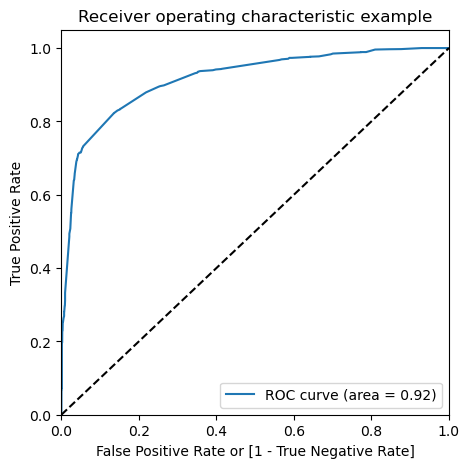

In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [111]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.038517,1871,0,1,0,0,0,0,0,0,0,0,0
1,0,0.294605,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.011329,3516,0,1,0,0,0,0,0,0,0,0,0
3,0,0.164919,8105,0,1,1,0,0,0,0,0,0,0,0
4,0,0.123124,3934,0,1,1,0,0,0,0,0,0,0,0


In [112]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.625232  0.973236  0.410795
0.2   0.2  0.757421  0.935523  0.647676
0.3   0.3  0.842455  0.834144  0.847576
0.4   0.4  0.848330  0.821979  0.864568
0.5   0.5  0.862863  0.726683  0.946777
0.6   0.6  0.863018  0.711273  0.956522
0.7   0.7  0.850186  0.664234  0.964768
0.8   0.8  0.816636  0.560827  0.974263
0.9   0.9  0.731602  0.311436  0.990505


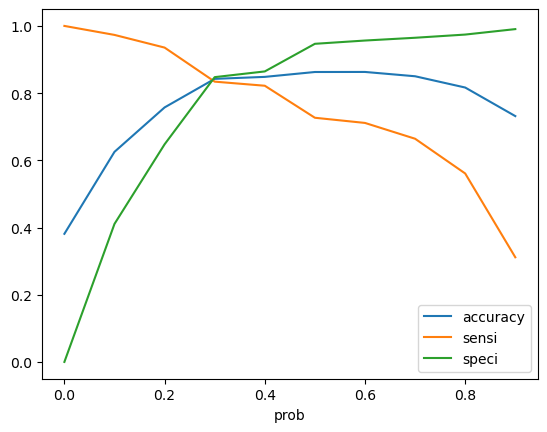

In [113]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [114]:
# Creating the column with selected cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.038517,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.294605,6795,0,1,1,1,0,0,0,0,0,0,0,1
2,0,0.011329,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.164919,8105,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.123124,3934,0,1,1,0,0,0,0,0,0,0,0,0


In [115]:
# Let's check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8189548546691404

In [116]:
# Creating New Confusion Matrix to learn the sensitivity and specificity

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model
print('Sensitivity : ',TP/float(TP+FN))
# Let us calculate specificity
print('Specificity : ',TN / float(TN+FP))
# Calculate false postive rate - predicting Converted when student does not have Converted
print('False Positive Rate : ',FP/ float(TN+FP))
# positive predictive value 
print('Positive Predicted Rate : ',TP / float(TP+FP))
# Negative predictive value
print('Negative Predicted Value : ',TN / float(TN+ FN))

Sensitivity :  0.8791565287915653
Specificity :  0.7818590704647677
False Positive Rate :  0.2181409295352324
Positive Predicted Rate :  0.7129233804669517
Negative Predicted Value :  0.9130434782608695


Since the Sensitivity has now risen to 87.9% with an Accuracy on DL model of nearly 82%, this model is ready to be tested for precision and recall

### Precision and Recall

In [117]:
# Calculating Precision

# TP / TP + FP
print('Precision : ',confusion2[1,1]/(confusion2[0,1]+confusion2[1,1]))


# Calculating Recall

# TP / TP + FN
print('Recall : ', confusion2[1,1]/(confusion2[1,0]+confusion2[1,1]))

Precision :  0.7129233804669517
Recall :  0.8791565287915653


Since the Recall is already high, and we wanted a higher recall, So don't need to go for trade off

In [118]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

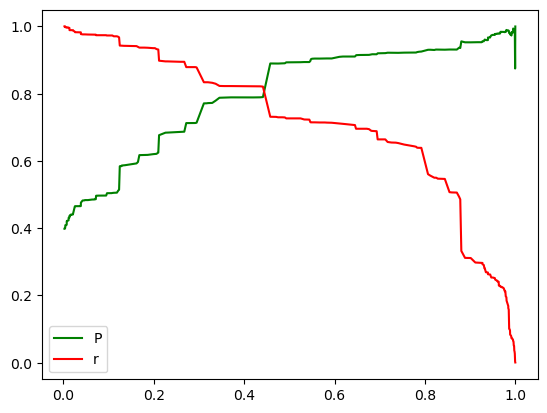

In [119]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend('Precision vs Recall')
plt.show()

Taking the New Cut Off from Precision Recall Trade off Curve as 0.42

### Making Predictions on Test Data Set

In [120]:
# Redefining the test data set with selected col from DL Modeling
X_test = X_test[col]

# Adding constatnt to the model
X_test_sm = sm.add_constant(X_test)

X_test_sm.head()

,const,Do Not Email,LO_Form,LS_Welingak,LA_ELink,LA_PhoneCall,LA_Modified,LA_Chat,LA_Website,LA_SMS,SP_NP,NaN,TG_Interested,TG_LeadLost,LQ_Low,LQ_NotSure,LQ_Worst
4269,1.0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
2376,1.0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0
7766,1.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
9199,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4359,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [121]:
# Making Predictions and making a DataFrame 
y_test_pred = res15.predict(X_test_sm)
y_test_pred=y_test_pred.values.reshape(-1)

# Creating a dataframe with the actual converted flag and the predicted probabilities
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['ID'] = y_test.index
# Creating new column 'predicted' with 1 if Converted_Prob > y else 0
y_test_pred_final['predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
print(confusion)
# Let's check the overall accuracy.
print('The Accuracy of the GLM Model is: ',round(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted)*100))


[[1432  245]
 [ 190  905]]
The Accuracy of the GLM Model is:  84


In [122]:
# Creating New Confusion Matrix to learn the sensitivity and specificity

confusion3 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model
print('Sensitivity : ',TP/float(TP+FN))
# Let us calculate specificity
print('Specificity : ',TN / float(TN+FP))
# Calculate false postive rate - predicting Converted when student does not have Converted
print('False Positive Rate : ',FP/ float(TN+FP))
# positive predictive value 
print('Positive Predicted Rate : ',TP / float(TP+FP))
# Negative predictive value
print('Negative Predicted Value : ',TN / float(TN+ FN))

Sensitivity :  0.8264840182648402
Specificity :  0.8539057841383423
False Positive Rate :  0.14609421586165772
Positive Predicted Rate :  0.7869565217391304
Negative Predicted Value :  0.8828606658446363


The Sensitivity has dropped, but still is high and Good.

### Log Odds = 3.8315 + 1.2376 X (Do Not Email) + 2.4458 X (LO_Form) + 2.0615 X (LS_Welingak) + 0.9734 X (LA_Elink) + 3.3017 X (LA_PhoneCall) + (-1.0901) X (LA_Modified) + (-1.1358) X (LA_Chat) + (-0.4422) X (LA_Website) + 2.2094 X (LA_SMS) + (-0.6375) X (SP_NP) + 0.221 X (nan) + 3.5959 X (TG_Interested) + 0.213 X (TG_LeadLost) + 1.9229 X (LQ_Low) + 0.6141 X (LQ_NotSure) + (-2.7926) X (LQ_Worst)


# Output : The Model res15 will give scoring between 0 to 1, higher the score, higher are the chances of conversion